Top performers:
* genperdem:FR_Windoffshore_minimizing_0.07
* genpernomgdp:EU_Windoffshore_minimizing_0.07
* genpercapgdp:IT_Solar_minimizing_0.15
* capperpop:FR_Solar_minimizing_0.15
* capperland:UK_Solar_minimizing_0.15
* capperco2:FR_Solar_minimizing_0.07

In [10]:
import pandas as pd
import geopandas as gpd
import glob
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)
pd.options.mode.chained_assignment = None  # default='warn'

from shapely.geometry import Polygon
import matplotlib.patches as mpatches

In [11]:
colordict = {"NaturalgasCCGTwithCCSnewOT":"#b20101",
             "NaturalgasOCGTnew":"#d35050",
             "HydroRes":"#08ad97",
             "HydroRoR":"#4adbc8",
             "Windoffshore":"#6895dd",
             "Windonshore":"#235ebc",
             "NuclearEPR":"#ff9000",
             "Solar":"#f9d002"}

In [12]:
clusterpath = "/cluster/work/projects/ec85/MENOFS/EU10CS/"

In [13]:
scenarios = glob.glob(clusterpath + "data/*.db")

In [14]:
for i in range(len(scenarios)):
    scenarios[i] = scenarios[i].replace('data/','')
    scenarios[i] = scenarios[i].replace('.db','')

In [15]:
len(scenarios)

697

In [16]:
top_performers = [
    'FR_Windoffshore_minimizing_0.07',
    'EU_Windoffshore_minimizing_0.07',
    'IT_Solar_minimizing_0.15',
    'FR_Solar_minimizing_0.15',
    'UK_Solar_minimizing_0.15',
    'FR_Solar_minimizing_0.07'
                 ]

In [17]:
top_performers

['FR_Windoffshore_minimizing_0.07',
 'EU_Windoffshore_minimizing_0.07',
 'IT_Solar_minimizing_0.15',
 'FR_Solar_minimizing_0.15',
 'UK_Solar_minimizing_0.15',
 'FR_Solar_minimizing_0.07']

In [18]:
# see if this can be done with list comprehension
p_cap_dfs = []
for scenario in top_performers:
    print(scenario + ".db")
    con = sqlite3.connect(clusterpath + "data/" + str(scenario) + ".db")
    p_cap_dfs.append(
        pd
        .read_sql_query("SELECT * from var_tot_pcap_z",con)
        .set_index(["z","g"])
        .stack()
        .reset_index()
        .rename(
            columns={
                "z": "zone",
                "g": "technology",
                0: "installed_capacity_GW",
                "level_2": "type"})
        .assign(scenario=scenario)
        .set_index(["scenario","zone","technology","type"])
        .sort_index())
    con.close()
p_cap2 = pd.concat(p_cap_dfs)
del(p_cap_dfs)

FR_Windoffshore_minimizing_0.07.db
EU_Windoffshore_minimizing_0.07.db
IT_Solar_minimizing_0.15.db
FR_Solar_minimizing_0.15.db
UK_Solar_minimizing_0.15.db
FR_Solar_minimizing_0.07.db


In [19]:
# see if this can be done with list comprehension
extras = [' baseline']

p_cap_dfs = []
for extra_scenario in extras:
    print(extra_scenario + ".db")
    con = sqlite3.connect(clusterpath + "data/" + str(extra_scenario) + ".db")
    p_cap_dfs.append(
        pd
        .read_sql_query("SELECT * from var_tot_pcap_z",con)
        .set_index(["z","g"])
        .stack()
        .reset_index()
        .rename(
            columns={
                "z": "zone",
                "g": "technology",
                0: "installed_capacity_GW",
                "level_2": "type"})
        .assign(scenario=extra_scenario)
        .set_index(["scenario","zone","technology","type"])
        .sort_index())
    con.close()
p_cap2_base = pd.concat(p_cap_dfs)
del(p_cap_dfs)

 baseline.db


In [20]:
p_cap2.loc[
        (slice(None),slice(None),slice(None),'level')
    ].loc[
        (scenario,slice(None),slice(None))
    ].unstack(
    ).droplevel(level=0,axis=1)

technology  HydroRes   HydroRoR  NaturalgasCCGTwithCCSnewOT  \
zone                                                          
AT           2.96490   5.542609                    1.783615   
BE           0.00000   0.113002                   12.562336   
BG           1.56600   0.000000                    1.086000   
CH           8.20806   4.645424                    1.996965   
CZ           0.65000   0.439494                    7.466924   
DE           0.74000   4.774911                   32.301292   
DK           0.00000   0.008902                    3.530718   
EE           0.00000   0.007966                    0.828402   
ES          18.18650   1.085129                    1.353106   
FI           1.34500   3.263915                   11.125478   
FR           8.21366  10.313961                   55.538756   
GR           2.45600   0.000000                    0.998464   
HR           1.38800   0.420967                    1.450222   
HU           0.02800   0.028606                    1.989182   
IE           0.00000   0.214752                    1.292830   
IT           6.36200  10.718888                    8.052399   
LT           0.00000   0.127801                    0.835541   
LU           0.01100   0.024913                    1.533028   
LV           0.00000   1.536865                    0.825535   
NL           0.00000   0.037621                   11.256777   
NO          19.67522  13.768556                    1.707181   
PL           0.15617   0.376539                   18.591901   
PT           1.43620   2.978932                    0.706590   
RO           3.80000   2.669893                    1.169204   
SE          16.18400   0.000000                    6.858810   
SI           0.22200   1.052935                    1.644542   
SK           0.41400   1.202921                    2.060332   
UK           0.00000   0.000000                    9.688238   

technology  NaturalgasOCGTnew  NuclearEPR         Solar  Windoffshore  \
zone                                                                    
AT                   2.267171    0.498701  1.340977e+02      0.000000   
BE                   4.844162    0.618256  4.065483e+01     13.499280   
BG                   1.154438    0.451819  5.248097e+01      2.135146   
CH                   2.439295    0.525880  7.461407e+01      0.000000   
CZ                   2.317353    0.694744  7.795384e+01      0.000000   
DE                   4.203620    0.560556  3.025673e+02    145.154511   
DK                   3.547322    0.456740  2.164705e+01      4.017759   
EE                   1.151198    0.408320  6.355306e+00      1.453818   
ES                   2.041515    0.452715  3.186785e+02      4.630661   
FI                   3.322151    0.614029  1.630692e+01     27.388031   
FR                  10.865573    0.630577  1.944007e-10    167.353290   
GR                   1.176741    0.415073  5.560393e+01      1.498618   
HR                   1.151732    0.491993  3.612650e+01      0.935665   
HU                   1.161084    0.561042  4.843644e+01      0.000000   
IE                   2.644906    0.432256  3.688039e+01      7.400996   
IT                   1.407544    0.535092  4.046335e+02      1.036498   
LT                   1.156556    0.413974  8.796905e+00      2.064783   
LU                   1.189138    0.543440  1.879751e+00      0.000000   
LV                   1.149892    0.408385  7.962422e+00      1.435487   
NL                   4.856816    0.566188  4.767035e+01     32.236773   
NO                   3.398690    0.410844  6.263157e+00     14.404473   
PL                   4.777639    0.606981  1.394828e+02     20.053568   
PT                   1.143115    0.392370  3.262670e+01      2.722710   
RO                   1.147120    0.462477  4.577977e+01     12.892035   
SE                   3.646909    0.499931  9.835612e+00     32.733429   
SI                   1.176810    0.514806  1.963545e+01      0.000000   
SK                   1.166736    0.577282  3.315422e+01      0.00

In [21]:
p_cap2.loc[
        (slice(None),slice(None),slice(None),'level')
    ].loc[
        ('FR_Windoffshore_minimizing_0.07',slice(None),slice(None))
    ].unstack(
    ).droplevel(
        level=0,
        axis=1
    ).assign(tot = lambda x : x.HydroRes + x.HydroRoR + x.NaturalgasCCGTwithCCSnewOT + x.NaturalgasOCGTnew + x.NuclearEPR + x.Solar + x.Windoffshore + x.Windonshore)

technology  HydroRes   HydroRoR  NaturalgasCCGTwithCCSnewOT  \
zone                                                          
AT           2.96490   5.542619                    3.630856   
BE           0.00000   0.113234                   13.336035   
BG           1.56600   0.000000                    0.921764   
CH           8.20806   4.645448                    4.210911   
CZ           0.65000   0.439634                   10.063258   
DE           0.74000   4.774945                   43.558723   
DK           0.00000   0.008930                    2.379216   
EE           0.00000   0.007970                    0.873705   
ES          18.18650   1.085294                    2.044830   
FI           1.34500   3.263932                   11.120540   
FR           8.21366  10.314018                   46.527238   
GR           2.45600   0.000000                    0.848201   
HR           1.38800   0.420968                    1.789440   
HU           0.02800   0.028609                    2.651290   
IE           0.00000   0.215058                    2.513494   
IT           6.36200  10.718910                    8.926429   
LT           0.00000   0.127975                    0.884605   
LU           0.01100   0.024926                    1.818864   
LV           0.00000   1.536877                    0.871620   
NL           0.00000   0.037661                   12.131793   
NO          19.67522  13.768556                    1.643868   
PL           0.15617   0.376851                   21.205578   
PT           1.43620   2.978955                    0.844787   
RO           3.80000   2.669910                    1.022216   
SE          16.18400   0.000000                    7.749321   
SI           0.22200   1.052949                    2.227718   
SK           0.41400   1.202929                    2.761055   
UK           0.00000   0.000000                   19.613225   

technology  NaturalgasOCGTnew  NuclearEPR       Solar  Windoffshore  \
zone                                                                  
AT                   1.706037    0.513496  140.008754  0.000000e+00   
BE                   2.514888    0.560579   40.632660  1.356170e+01   
BG                   1.109395    0.432289   51.710513  1.921565e+00   
CH                   1.788370    0.537183   74.601993  0.000000e+00   
CZ                   1.704133    0.706349   76.571939  0.000000e+00   
DE                   2.403519    0.552223  207.431746  1.451774e+02   
DK                   2.295936    0.422057   10.945652  4.357816e+00   
EE                   1.112052    0.401996    6.235799  1.518207e+00   
ES                   1.699595    0.468000  251.626067  6.806477e+00   
FI                   2.320690    0.602505   15.682454  2.670416e+01   
FR                   2.883283    0.531639  533.384489  1.590049e-10   
GR                   1.108753    0.394405   53.311469  1.201850e+00   
HR                   1.109487    0.488028   31.495392  9.411615e-01   
HU                   1.112619    0.560906   47.318509  0.000000e+00   
IE                   1.974492    0.427231   34.379949  7.127138e+00   
IT                   1.331842    0.526146  402.520183  1.143999e+00   
LT                   1.116308    0.408527    8.937988  1.972193e+00   
LU                   1.153730    0.545267    1.879754  0.000000e+00   
LV                   1.111192    0.402538    7.739620  1.478519e+00   
NL                   2.434191    0.513222   47.623402  3.982864e+01   
NO                   2.297001    0.389746    5.286878  1.361582e+01   
PL                   2.261103    0.592976  130.922891  2.735555e+01   
PT                   1.158872    0.400168   38.072398  3.514010e+00   
RO                   1.108533    0.442244   49.174457  1.210593e+01   
SE                   2.363654    0.468336    7.850604  3.589628e+01   
SI                   1.124224    0.519756   17.374145  0.000000e+00   
SK                   1.116263    0.578849   31.632416  0.000000e+00   
UK                   3.843003    0.472328   41.681

In [22]:
row_nr = 0
column_nr = 0
fig = plt.figure(figsize=(24,24), dpi=300,layout="constrained")

gs = fig.add_gridspec(6,1, wspace = 0.1, hspace = 0.1)
#ax = plt.subplots(1,1,figsize=(10,6))

for scenario in top_performers:
    ax1 = fig.add_subplot(gs[row_nr,column_nr])
    print(scenario)
    p_cap2.loc[
        (slice(None),slice(None),slice(None),'level')
    ].loc[
        (scenario,slice(None),slice(None))
    ].unstack(
    ).droplevel(
        level=0,
        axis=1
    ).plot.bar(
        ax=ax1,
        stacked=True,
        #legend=False,
        title=scenario
        
    )
    
    ax1.legend(ncol=4,loc='upper right')
    ax1.set_ylim(0,1000)
    
    column_nr += 1
    if column_nr == 1:
        column_nr = 0
        row_nr += 1

        

FR_Windoffshore_minimizing_0.07
EU_Windoffshore_minimizing_0.07
IT_Solar_minimizing_0.15
FR_Solar_minimizing_0.15
UK_Solar_minimizing_0.15
FR_Solar_minimizing_0.07


In [23]:
highRES_zones = pd.read_csv('data/zones.csv')#.set_index('zone')
desired_regions = list(highRES_zones.zone)

In [24]:
europe = (
    gpd.read_file(
        'data/NUTS_RG_10M_2021_4326.geojson',
        crs = "EPSG:4326")
    .replace(
        {
            #"UK":"GB",
            "EL":"GR"})
    .rename(columns={"id":"index"})
    .loc[:,["index","geometry"]]
    .sort_values("index")
    .set_index('index')
    .drop(["AL","ME","MK","NO0B1","NO0B2","RS","TR","LI"])
    .loc[desired_regions]
)

In [25]:
rectx1 = -12
rectx2 = 44
recty1 = 33
recty2 = 72
polygon = Polygon([(rectx1, recty1), (rectx1, recty2), (rectx2, recty2),
                   (rectx2, recty1), (rectx1, recty1)])
europe = gpd.clip(europe,polygon)

<Axes: >

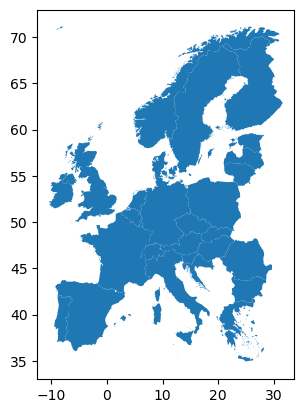

In [26]:
europe.plot()

In [27]:
p_cap2.loc[
    ('FR_Windoffshore_minimizing_0.07',slice(None),slice(None),'level')
].sort_values(
    by='installed_capacity_GW',ascending=False
).reset_index(
).rename(
    columns={'zone' : 'index'}
).reset_index(
).merge(
    europe.reset_index()
).drop(
    columns={'level_0'}
)

index                  technology  installed_capacity_GW  \
0      FR                       Solar             533.384489   
1      FR                 Windonshore             253.382716   
2      FR  NaturalgasCCGTwithCCSnewOT              46.527238   
3      FR                    HydroRoR              10.314018   
4      FR                    HydroRes               8.213660   
..    ...                         ...                    ...   
219    LU           NaturalgasOCGTnew               1.153730   
220    LU                  NuclearEPR               0.545267   
221    LU                    HydroRoR               0.024926   
222    LU                    HydroRes               0.011000   
223    LU                Windoffshore               0.000000   

                                              geometry  
0    MULTIPOLYGON (((9.40190 41.71861, 9.33866 41.6...  
1    MULTIPOLYGON (((9.40190 41.71861, 9.33866 41.6...  
2    MULTIPOLYGON (((9.40190 41.71861, 9.33866 41.6...  
3    MULTIPOLYGON (((9.40190 41.71861, 9.33866 41.6...  
4    MULTIPOLYGON (((9.40190 41.71861, 9.33866 41.6...  
..                                                 ...  
219  POLYGON ((6.12792 50.04735, 6.25336 49.89093, ...  
220  POLYGON ((6.12792 50.04735, 6.25336 49.89093, ...  
221  POLYGON ((6.12792 50.04735, 6.25336 49.89093, ...  
222  POLYGON ((6.12792 50.04735, 6.25336 49.89093, ...  
223  POLYGON ((6.12792 50.04735, 6.25336 49.89093, ...  

[224 rows x 4 columns]

In [28]:
trans_cap = []

for scenario in top_performers:
    print(scenario + ".db")
    con = sqlite3.connect(clusterpath + "data/" + str(scenario) + ".db")
    trans_cap.append(
        pd
        .read_sql_query(
        "SELECT * from var_trans_pcap", con)
        .set_index(['z','z_alias','trans'])
        .stack()
        .reset_index()
        .rename(
            columns={"z": "country_1","z_alias": "country_2","level" : "installed_capacity_GW"})
        .assign(scenario=scenario)
        .set_index(["scenario","country_1","country_2","trans","level_3"])
        .sort_index())
    con.close()
        
trans_cap2 = pd.concat(trans_cap)
del(trans_cap)


FR_Windoffshore_minimizing_0.07.db
EU_Windoffshore_minimizing_0.07.db
IT_Solar_minimizing_0.15.db
FR_Solar_minimizing_0.15.db
UK_Solar_minimizing_0.15.db
FR_Solar_minimizing_0.07.db


In [31]:
extras

[' baseline']

In [32]:
trans_cap = []

for extra_scenario in extras:
    print(extra_scenario + ".db")
    con = sqlite3.connect(clusterpath + "data/" + str(extra_scenario) + ".db")
    trans_cap.append(
        pd
        .read_sql_query(
        "SELECT * from var_trans_pcap", con)
        .set_index(['z','z_alias','trans'])
        .stack()
        .reset_index()
        .rename(
            columns={"z": "country_1","z_alias": "country_2","level" : "installed_capacity_GW"})
        .assign(scenario=extra_scenario)
        .set_index(["scenario","country_1","country_2","trans","level_3"])
        .sort_index())
    con.close()
        
trans_base = pd.concat(trans_cap)
del(trans_cap)


 baseline.db


In [33]:
# see if this can be done with list comprehension
p_cap_dfs = []
for scenario in top_performers:
    print(scenario + ".db")
    con = sqlite3.connect(clusterpath + "data/" + str(scenario) + ".db")
    p_cap_dfs.append(
        pd
        .read_sql_query("SELECT * from var_tot_pcap_z",con)
        .set_index(["z","g"])
        .stack()
        .reset_index()
        .rename(
            columns={
                "z": "zone",
                "g": "technology",
                0: "installed_capacity_GW",
                "level_2": "type"})
        .assign(scenario=scenario)
        .set_index(["scenario","zone","technology","type"])
        .sort_index())
    con.close()
p_cap2 = pd.concat(p_cap_dfs)
del(p_cap_dfs)

FR_Windoffshore_minimizing_0.07.db
EU_Windoffshore_minimizing_0.07.db
IT_Solar_minimizing_0.15.db
FR_Solar_minimizing_0.15.db
UK_Solar_minimizing_0.15.db
FR_Solar_minimizing_0.07.db


In [34]:
p_cap2.loc[
    (scenario,slice(None),slice(None),'level')
].sort_values(
    by='zone'
).reset_index(
).rename(
    columns={'zone' : 'index'}
).reset_index(
).merge(
    europe.reset_index()
).drop(
    columns={'level_0'}
)

index                  technology  installed_capacity_GW  \
0      AT                    HydroRes               2.964900   
1      AT                    HydroRoR               5.542609   
2      AT  NaturalgasCCGTwithCCSnewOT               1.783615   
3      AT           NaturalgasOCGTnew               2.267171   
4      AT                  NuclearEPR               0.498701   
..    ...                         ...                    ...   
219    UK  NaturalgasCCGTwithCCSnewOT               9.688238   
220    UK           NaturalgasOCGTnew               7.939512   
221    UK                  NuclearEPR               0.510261   
222    UK                       Solar             199.381522   
223    UK                 Windonshore              40.942264   

                                              geometry  
0    POLYGON ((15.75363 48.85218, 15.84752 48.86067...  
1    POLYGON ((15.75363 48.85218, 15.84752 48.86067...  
2    POLYGON ((15.75363 48.85218, 15.84752 48.86067...  
3    POLYGON ((15.75363 48.85218, 15.84752 48.86067...  
4    POLYGON ((15.75363 48.85218, 15.84752 48.86067...  
..                                                 ...  
219  MULTIPOLYGON (((-0.22283 51.47182, -0.19840 51...  
220  MULTIPOLYGON (((-0.22283 51.47182, -0.19840 51...  
221  MULTIPOLYGON (((-0.22283 51.47182, -0.19840 51...  
222  MULTIPOLYGON (((-0.22283 51.47182, -0.19840 51...  
223  MULTIPOLYGON (((-0.22283 51.47182, -0.19840 51...  

[224 rows x 4 columns]

## FR_Windoffshore_minimizing

In [35]:
europe_shape = europe.copy().assign(
    center = lambda x : x.geometry.centroid,
    x_coord = lambda x : x.centroid.x,
    y_coord = lambda x : x.centroid.y,
)

In [36]:
europe_shape#.reindex(index=df_cap.set_index('index').index)

geometry  \
index                                                      
FR     MULTIPOLYGON (((9.40190 41.71861, 9.33866 41.6...   
ES     MULTIPOLYGON (((4.24593 39.81610, 4.03367 39.9...   
PT     POLYGON ((-8.05186 41.82061, -7.89843 41.91935...   
IT     MULTIPOLYGON (((12.69064 46.65697, 12.73139 46...   
CH     POLYGON ((8.79571 47.67560, 8.78152 47.71253, ...   
AT     POLYGON ((15.75363 48.85218, 15.84752 48.86067...   
LU     POLYGON ((6.12792 50.04735, 6.25336 49.89093, ...   
BE     POLYGON ((5.08780 51.38230, 5.14481 51.32092, ...   
DE     MULTIPOLYGON (((9.42293 54.82322, 9.44265 54.8...   
NL     MULTIPOLYGON (((6.91836 53.34529, 6.99302 53.3...   
GR     MULTIPOLYGON (((29.58469 36.11136, 29.55394 36...   
BG     POLYGON ((23.25146 43.83394, 23.42310 43.85153...   
HR     MULTIPOLYGON (((16.85476 46.35044, 16.87604 46...   
RO     POLYGON ((27.44355 47.53666, 27.47784 47.49154...   
SI     POLYGON ((16.37983 46.54031, 16.24215 46.49008...   
HU     POLYGON ((22.15531 48.40340, 22.24829 48.41203...   
SK     POLYGON ((19.96275 49.23031, 20.07834 49.18721...   
CZ     POLYGON ((14.41509 51.02507, 14.49122 51.04353...   
PL     MULTIPOLYGON (((19.35966 54.37231, 19.63903 54...   
LT     POLYGON ((25.86938 56.00199, 26.04615 55.94411...   
LV     POLYGON ((27.54521 57.53444, 27.56053 57.50571...   
EE     MULTIPOLYGON (((25.88224 59.61091, 25.94783 59...   
SE     MULTIPOLYGON (((23.80965 65.78275, 23.68765 65...   
FI     MULTIPOLYGON (((28.45147 68.91507, 28.48638 68...   
IE     MULTIPOLYGON (((-7.34292 55.05048, -7.39675 55...   
UK     MULTIPOLYGON (((-0.22283 51.47182, -0.19840 51...   
DK     MULTIPOLYGON (((14.94371 55.21017, 14.97051 55...   
NO     MULTIPOLYGON (((28.83032 69.12078, 28.85331 69...   

                          center    x_coord    y_coord  
index                                                   
FR      POINT (2.55424 46.55768)   2.554238  46.557678  
ES     POINT (-3.48959 40.38024)  -3.489585  40.380235  
PT     POINT (-7.96852 39.68285)  -7.968518  39.682855  
IT     POINT (12.07996 42.78150)  12.079961  42.781497  
CH      POINT (8.22795 46.79779)   8.227952  46.797794  
AT     POINT (14.13941 47.58739)  14.139409  47.587387  
LU      POINT (6.09415 49.77467)   6.094151  49.774670  
BE      POINT (4.66403 50.64045)   4.664033  50.640451  
DE     POINT (10.39193 51.10700)  10.391927  51.106998  
NL      POINT (5.59203 52.26979)   5.592035  52.269792  
GR     POINT (22.97718 39.04389)  22.977184  39.043889  
BG     POINT (25.23565 42.75840)  25.235647  42.758399  
HR     POINT (16.40204 45.04137)  16.402036  45.041370  
RO     POINT (24.98267 45.83996)  24.982666  45.839963  
SI     POINT (14.81986 46.11875)  14.819858  46.118746  
HU     POINT (19.41128 47.16472)  19.411278  47.164718  
SK     POINT (19.48357 48.70752)  19.483574  48.707518  
CZ     POINT (15.33165 49.73881)  15.331655  49.738809  
PL     POINT (19.40204 52.12512)  19.402043  52.125123  
LT     POINT (23.89672 55.33691)  23.896718  55.336906  
LV     POINT (24.92714 56.85398)  24.927138  56.853984  
EE     POINT (25.54907 58.67160)  25.549065  58.671596  
SE     POINT (16.75901 62.76754)  16.759010  62.767543  
FI     POINT (26.22558 64.47348)  26.225579  64.473482  
IE     POINT (-8.14500 53.17991)  -8.145001  53.179906  
UK     POINT (-2.90206 54.16183)  -2.902061  54.161828  
DK     POINT (10.04638 55.96693)  10.046377  55.966930  
NO     POINT (13.98601 64.44495)  13.986007  64.444950

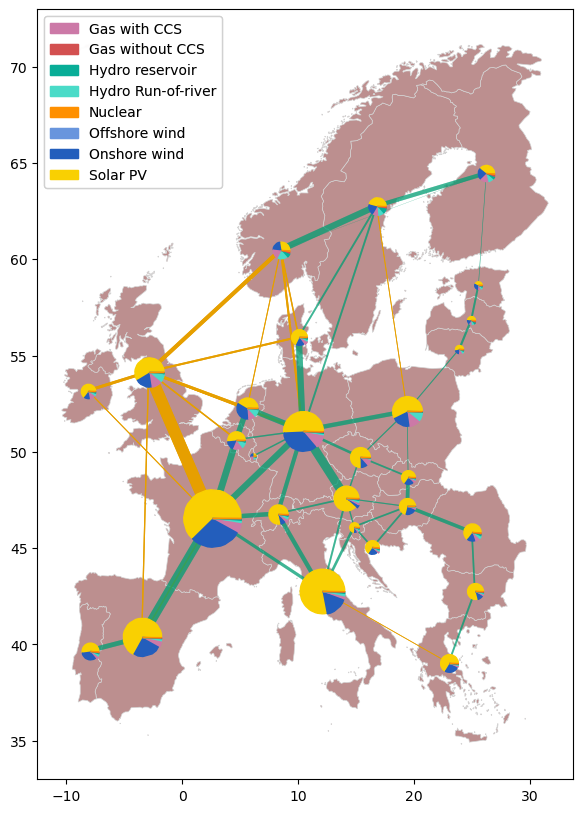

In [37]:
scenario = 'FR_Windoffshore_minimizing_0.07'

europe_shape = europe.copy().assign(
    center = lambda x : x.geometry.centroid,
    x_coord = lambda x : x.centroid.x,
    y_coord = lambda x : x.centroid.y,
)

europe_shape.at['NO', 'x_coord'] = 8.5
europe_shape.at['NO', 'y_coord'] = 60.5

df_cap = p_cap2.loc[
    (scenario,slice(None),slice(None),'level')
].sort_values(
    by='installed_capacity_GW',ascending=False
).reset_index(
).rename(
    columns={'zone' : 'index'}
).reset_index(
).merge(
    europe.reset_index()
).drop(
    columns={'level_0'}
)

europe_shape = europe_shape.reindex(index=df_cap.set_index('index').index.unique())

df_trans = trans_cap2.loc[
    (scenario,slice(None),slice(None),slice(None),'level')
].reset_index(
)

df_trans_overhead = df_trans.loc[df_trans['trans'] == "HVAC400KV"].rename(columns={0 : 'level'})
df_trans_subsea = df_trans.loc[df_trans['trans'] == "HVDCSubsea"].reset_index(drop=True).rename(columns={0 : 'level'})

europe_trans = europe_shape.copy().sort_values("index").reset_index()

# The transmission connections are simply plotted as a line between the zones. 
df_trans_overhead['x1_coord'] = None
df_trans_overhead['y1_coord'] = None
df_trans_overhead['x2_coord'] = None
df_trans_overhead['y2_coord'] = None

for i in range(len(df_trans_overhead.index)):
    df_trans_overhead.x1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_1.iloc[i]].x_coord.to_numpy()[0]
    df_trans_overhead.y1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_1.iloc[i]].y_coord.to_numpy()[0]
    df_trans_overhead.x2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_2.iloc[i]].x_coord.to_numpy()[0]
    df_trans_overhead.y2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_2.iloc[i]].y_coord.to_numpy()[0]

df_trans_subsea['x1_coord'] = None
df_trans_subsea['y1_coord'] = None
df_trans_subsea['x2_coord'] = None
df_trans_subsea['y2_coord'] = None

for i in range(len(df_trans_subsea.index)):
    df_trans_subsea.x1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_1.iloc[i]].x_coord.to_numpy()[0]
    df_trans_subsea.y1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_1.iloc[i]].y_coord.to_numpy()[0]
    df_trans_subsea.x2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_2.iloc[i]].x_coord.to_numpy()[0]
    df_trans_subsea.y2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_2.iloc[i]].y_coord.to_numpy()[0]

gdf_cap = gpd.GeoDataFrame(
    df_cap,
    crs = 'EPSG:4326',
    geometry = df_cap.geometry
).set_index('index')

pieList = []

for country in gdf_cap.index.unique():
    wedges = []
    for i in range(8):
        temp = abs(df_cap.loc[
            (
                df_cap["index"] == str(country)
            )
        ].set_index(
            'technology'
        ).installed_capacity_GW.iloc[i])
        wedges.append(temp)
        #print(temp)
    pie = plt.pie(wedges,
                 colors = [
            "#f9d002",
            "#235ebc",
            "#CC79A7",
            "#4adbc8",
            "#08ad97",
            "#d35050",
            "#ff9000",
            "#6895dd",
        ])
    plt.close()
    pieList.append(pie)

piecolors = [
    "#f9d002",
    "#235ebc",
    "#CC79A7",
    "#4adbc8",
    "#08ad97",
    "#d35050",
    "#ff9000",
    "#6895dd",
]

fig, ax = plt.subplots(
    figsize = (10,10)
)

europe_shape.plot(
    ax=ax,
    color = 'rosybrown',
    edgecolor = 'lightgrey',
    linewidth = 0.5
    
)

gas_ccs_patch = mpatches.Patch(color='#CC79A7', label='Gas with CCS')
gas_patch = mpatches.Patch(color='#d35050', label='Gas without CCS')
hydro_res = mpatches.Patch(color='#08ad97', label='Hydro reservoir')
hydro_ror = mpatches.Patch(color='#4adbc8', label='Hydro Run-of-river')
nuclear = mpatches.Patch(color='#ff9000', label='Nuclear')
offshore = mpatches.Patch(color='#6895dd', label='Offshore wind')
onshore = mpatches.Patch(color='#235ebc', label='Onshore wind')
solar = mpatches.Patch(color='#f9d002', label='Solar PV')
overhead_trans = mpatches.Patch(color='#009E73', label='HVAC400KV')
subsea_trans = mpatches.Patch(color='#E69F00', label='HVDCSubsea')

first_legend = plt.legend(
    handles=[
        gas_ccs_patch, 
        gas_patch, 
        hydro_res,
        hydro_ror,
        nuclear,
        offshore,
        onshore,
        solar
    ], 
    loc = 'upper left'
)

plt.gca().add_artist(first_legend)

for i in range(len(gdf_cap.index.unique())):
    #print(norway_shape.iloc[i])
    name = europe_shape.iloc[i].name
    for j in range(7):
        ax.scatter(
            europe_shape.x_coord[i],
            europe_shape.y_coord[i],
            marker=(
                pieList[i][0][j].get_path().vertices.tolist()
            ),
            facecolor=piecolors[j], 
            s=gdf_cap.loc[name].installed_capacity_GW.sum()*2,
            zorder=10
        )
        
#plot subsea cables
for i in range(len(df_trans_subsea.index)):
    plt.plot(
        [df_trans_subsea.x1_coord.iloc[i],df_trans_subsea.x2_coord.iloc[i]],
        [df_trans_subsea.y1_coord.iloc[i],df_trans_subsea.y2_coord.iloc[i]],
        '#E69F00',
        linewidth = df_trans_subsea.level.iloc[i]/3,
        alpha = 1,
        
    )    

# plot overhead cables
for i in range(len(df_trans_overhead.index)):
    plt.plot(
        [df_trans_overhead.x1_coord.iloc[i],df_trans_overhead.x2_coord.iloc[i]],
        [df_trans_overhead.y1_coord.iloc[i],df_trans_overhead.y2_coord.iloc[i]],
        '#009E73',
        linewidth = df_trans_overhead.level.iloc[i]/3,
        alpha = 0.5
    )  
        
plt.show()


In [38]:
df_trans_overhead.sort_values(by='level',ascending=False).head(50)

country_1 country_2      trans      level   x1_coord   y1_coord  \
49         FR        ES  HVAC400KV  19.499906   2.554238  46.557678   
39         ES        FR  HVAC400KV  19.499906  -3.489585  40.380235   
21         DE        AT  HVAC400KV  18.899916  10.391927  51.106998   
2          AT        DE  HVAC400KV  18.899916  14.139409  47.587387   
46         FR        BE  HVAC400KV  14.399890   2.554238  46.557678   
7          BE        FR  HVAC400KV  14.399890   4.664033  50.640451   
99         SE        NO  HVAC400KV  13.559918   16.75901  62.767543   
85         NO        SE  HVAC400KV  13.559918        8.5       60.5   
48         FR        DE  HVAC400KV  13.499935   2.554238  46.557678   
26         DE        FR  HVAC400KV  13.499935  10.391927  51.106998   
33         DK        DE  HVAC400KV  13.499914  10.046377   55.96693   
25         DE        DK  HVAC400KV  13.499914  10.391927  51.106998   
77         NL        BE  HVAC400KV  11.699871   5.592035  52.269792   
9          BE        NL  HVAC400KV  11.699871   4.664033  50.640451   
78         NL        DE  HVAC400KV  11.699835   5.592035  52.269792   
28         DE        NL  HVAC400KV  11.699835  10.391927  51.106998   
41         ES        PT  HVAC400KV  10.199905  -3.489585  40.380235   
92         PT        ES  HVAC400KV  10.199905  -7.968518  39.682855   
15         CH        FR  HVAC400KV   9.599897   8.227952  46.797794   
47         FR        CH  HVAC400KV   9.599897   2.554238  46.557678   
88         PL        DE  HVAC400KV   9.299951  19.402043  52.125123   
30         DE        PL  HVAC400KV   9.299951  10.391927  51.106998   
66         IT        CH  HVAC400KV   9.029940  12.079961  42.781497   
16         CH        IT  HVAC400KV   9.029940   8.227952  46.797794   
45         FI        SE  HVAC400KV   8.849943  26.225579  64.473482   
97         SE        FI  HVAC400KV   8.849943   16.75901  62.767543   
23         DE        CH  HVAC400KV   8.699947  10.391927  51.106998   
14         CH        DE  HVAC400KV   8.699947   8.227952  46.797794   
62         HU        SK  HVAC400KV   7.799714  19.411278  47.164718   
106        SK        HU  HVAC400KV   7.799714  19.483574  48.707518   
94         RO        HU  HVAC400KV   7.601934  24.982666  45.839963   
60         HU        RO  HVAC400KV   7.601934  19.411278  47.164718   
67         IT        FR  HVAC400KV   6.584956  12.079961  42.781497   
52         FR        IT  HVAC400KV   6.584956   2.554238  46.557678   
69         IT        SI  HVAC400KV   5.474899  12.079961  42.781497   
104        SI        IT  HVAC400KV   5.474899  14.819858  46.118746   
24         DE        CZ  HVAC400KV   5.399948  10.391927  51.106998   
18         CZ        DE  HVAC400KV   5.399948  15.331655  49.738809   
70         LT        LV  HVAC400KV   4.499835  23.896718  55.336906   
76         LV        LT  HVAC400KV   4.499835  24.927138  56.853984   
38         EE        LV  HVAC400KV   4.049848  25.549065  58.671596   
75         LV        EE  HVAC400KV   4.049848  24.927138  56.853984   
65         IT        AT  HVAC400KV   3.974959  12.079961  42.781497   
4          AT        IT  HVAC400KV   3.974959  14.139409  47.587387   
95         SE        DE  HVAC400KV   3.929961   16.75901  62.767543   
31         DE        SE  HVAC400KV   3.929961  10.391927  51.106998   
35         DK        SE  HVAC400KV   3.899962  10.046377   55.96693   
96         SE        DK  HVAC400KV   3.899962   16.75901  62.767543   
54         GR        BG  HVAC400KV   3.899923  22.977184  39.043889   
11         BG        GR  HVAC400KV   3.899923  25.235647  42.758399   

      x2_coord   y2_coord  
49   -3.489585  40.380235  
39    2.554238  46.557678  
21   14.139409  47.587387  
2    10.391927  51.106998  
46    4.664033  50.640451  
7     2.554238  46.557678  
99         8.5       60.5  
85    16.75901  62.767543  
48   10.391927  51.106998  
26    2.554238  46.557678  
33   10.391927  51.106998  
25   10.046377   55.96693  
77    4.664033  50

## All together now

FR_Windoffshore_minimizing_0.07


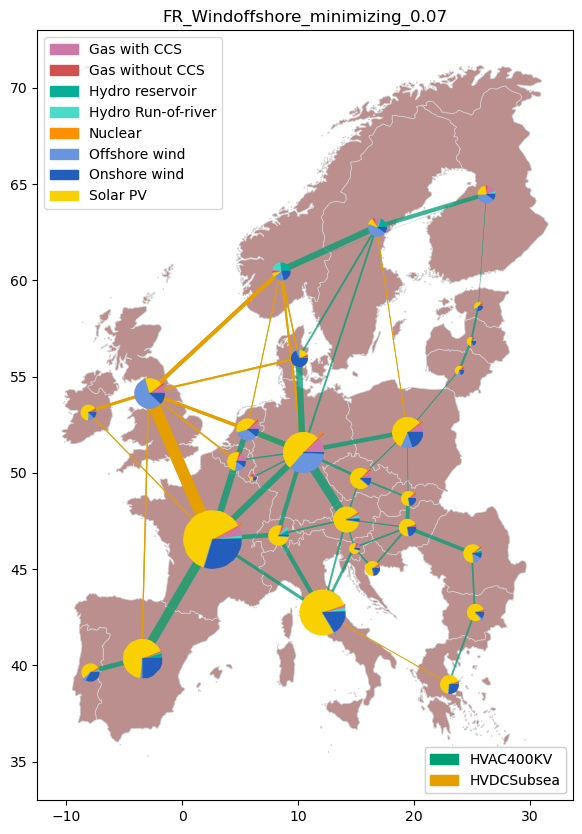

EU_Windoffshore_minimizing_0.07


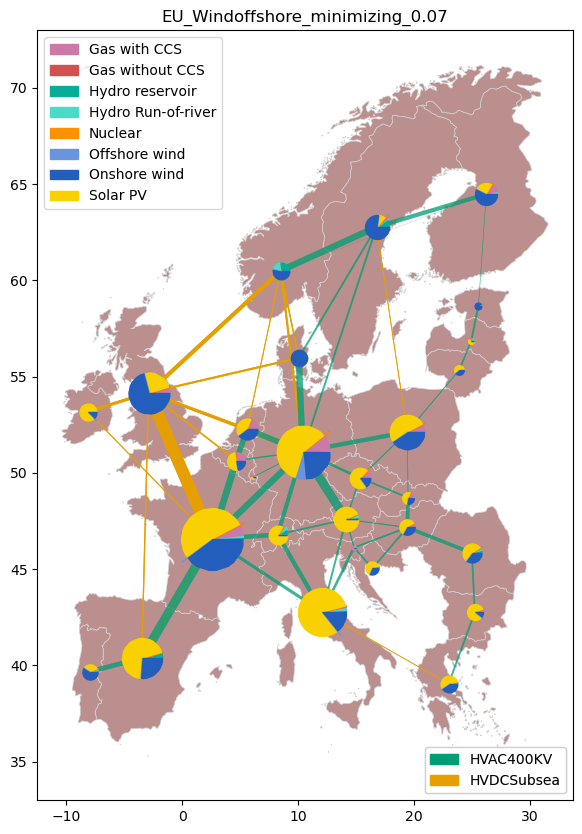

IT_Solar_minimizing_0.15


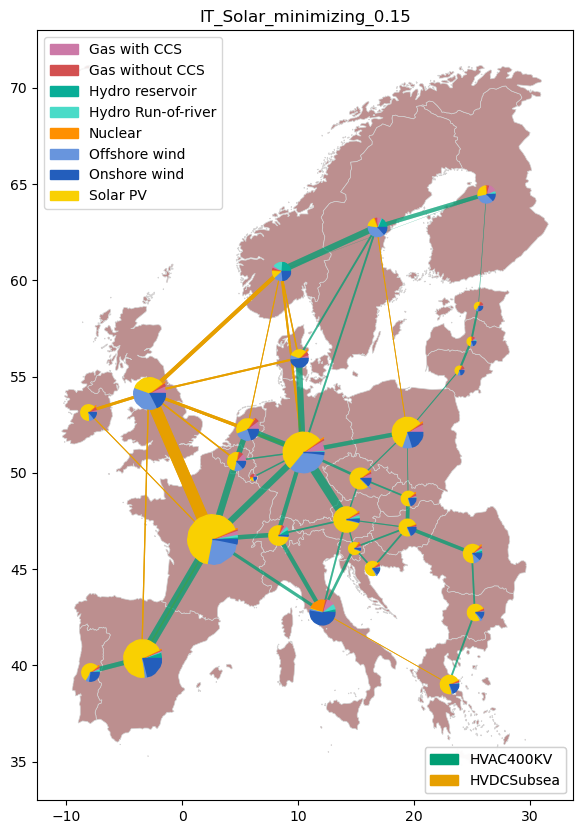

FR_Solar_minimizing_0.15


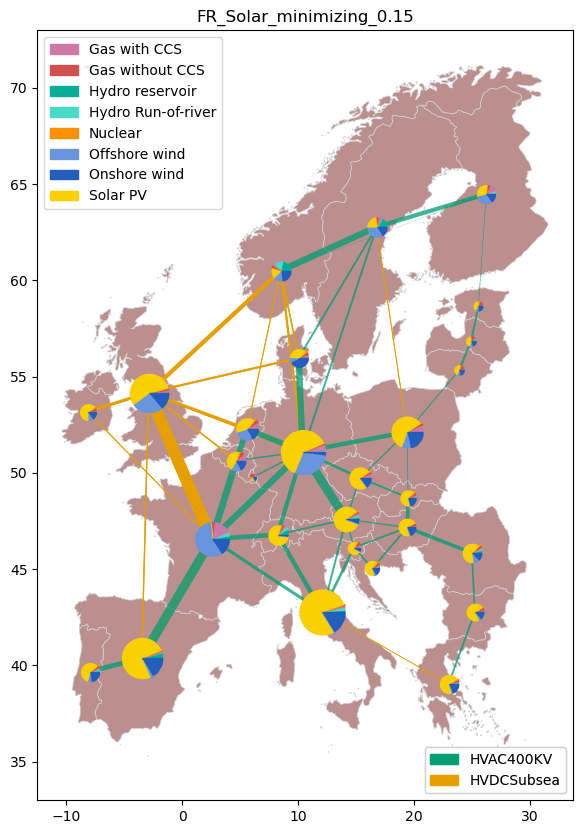

UK_Solar_minimizing_0.15


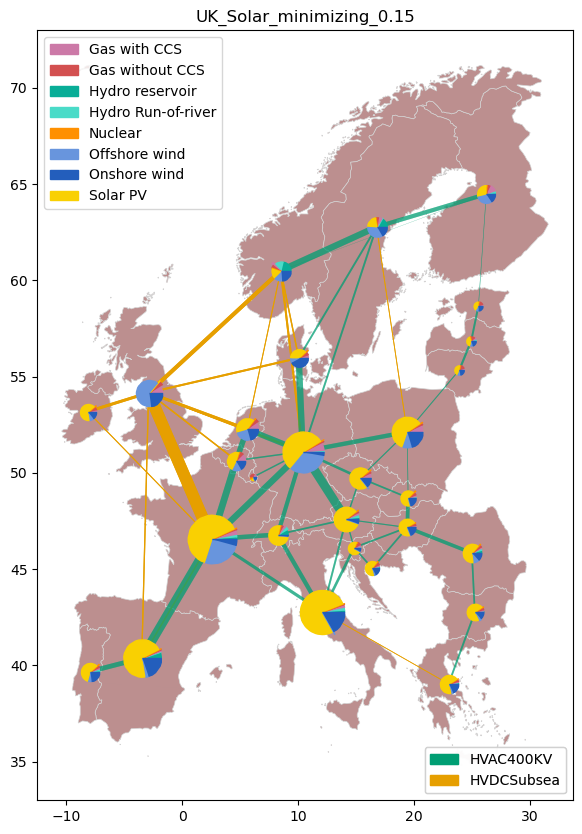

FR_Solar_minimizing_0.07


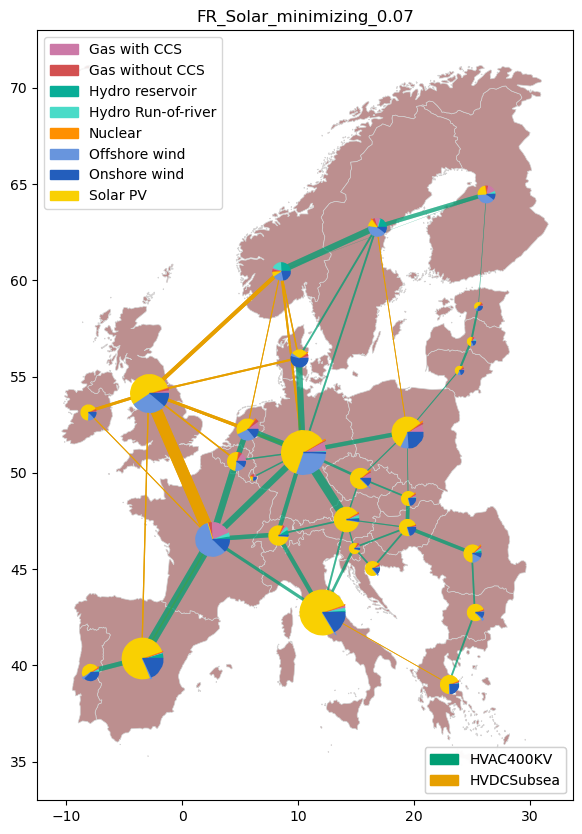

In [39]:
for scenario in top_performers:
    print(scenario)
    europe_shape = europe.copy().assign(
        center = lambda x : x.geometry.centroid,
        x_coord = lambda x : x.centroid.x,
        y_coord = lambda x : x.centroid.y,
    )
    
    europe_shape.at['NO', 'x_coord'] = 8.5
    europe_shape.at['NO', 'y_coord'] = 60.5
    
    df_trans = trans_cap2.loc[
        (scenario,slice(None),slice(None),slice(None),'level')
    ].reset_index(
    )
    
    df_trans_overhead = df_trans.loc[df_trans['trans'] == "HVAC400KV"].rename(columns={0 : 'level'})
    df_trans_subsea = df_trans.loc[df_trans['trans'] == "HVDCSubsea"].reset_index(drop=True).rename(columns={0 : 'level'})
    
    europe_trans = europe_shape.copy().sort_values("index").reset_index()
    
    # The transmission connections are simply plotted as a line between the zones. 
    df_trans_overhead['x1_coord'] = None
    df_trans_overhead['y1_coord'] = None
    df_trans_overhead['x2_coord'] = None
    df_trans_overhead['y2_coord'] = None
    
    for i in range(len(df_trans_overhead.index)):
        df_trans_overhead.x1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_1.iloc[i]].x_coord.to_numpy()[0]
        df_trans_overhead.y1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_1.iloc[i]].y_coord.to_numpy()[0]
        df_trans_overhead.x2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_2.iloc[i]].x_coord.to_numpy()[0]
        df_trans_overhead.y2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_2.iloc[i]].y_coord.to_numpy()[0]
    
    df_trans_subsea['x1_coord'] = None
    df_trans_subsea['y1_coord'] = None
    df_trans_subsea['x2_coord'] = None
    df_trans_subsea['y2_coord'] = None
    
    for i in range(len(df_trans_subsea.index)):
        df_trans_subsea.x1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_1.iloc[i]].x_coord.to_numpy()[0]
        df_trans_subsea.y1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_1.iloc[i]].y_coord.to_numpy()[0]
        df_trans_subsea.x2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_2.iloc[i]].x_coord.to_numpy()[0]
        df_trans_subsea.y2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_2.iloc[i]].y_coord.to_numpy()[0]
    
    df_cap = p_cap2.loc[
        (scenario,slice(None),slice(None),'level')
    ].sort_values(
        by='installed_capacity_GW',ascending=False
    ).reset_index(
    ).rename(
        columns={'zone' : 'index'}
    ).reset_index(
    ).merge(
        europe.reset_index()
    ).drop(
        columns={'level_0'}
    ).sort_values(
    by=['index','technology']
)
    
    europe_shape = europe_shape.reindex(index=df_cap.set_index('index').index.unique())
    
    gdf_cap = gpd.GeoDataFrame(
        df_cap,
        crs = 'EPSG:4326',
        geometry = df_cap.geometry
    ).set_index('index')
    
    pieList = []
    
    for country in gdf_cap.index.unique():
        wedges = []
        for i in range(8):
            temp = abs(df_cap.loc[
                (
                    df_cap["index"] == str(country)
                )
            ].set_index(
                'technology'
            ).installed_capacity_GW.iloc[i])
            wedges.append(temp)
            #print(temp)
        pie = plt.pie(wedges,
                     colors = [
                "#08ad97",
                "#4adbc8",
                "#CC79A7",
                "#d35050",
                "#ff9000",
                "#f9d002",
                "#6895dd",
                "#235ebc",
            ])
        plt.close()
        pieList.append(pie)
    
    piecolors = [
        "#08ad97",
        "#4adbc8",
        "#CC79A7",
        "#d35050",
        "#ff9000",
        "#f9d002",
        "#6895dd",
        "#235ebc",
    ]
    
    fig, ax = plt.subplots(
        figsize = (10,10)
    )
    
    europe_shape.plot(
        ax=ax,
        color = 'rosybrown',
        edgecolor = 'lightgrey',
        linewidth = 0.5
        
    )
    
    ax.set_title(scenario)
    
    gas_ccs_patch = mpatches.Patch(color='#CC79A7', label='Gas with CCS')
    gas_patch = mpatches.Patch(color='#d35050', label='Gas without CCS')
    hydro_res = mpatches.Patch(color='#08ad97', label='Hydro reservoir')
    hydro_ror = mpatches.Patch(color='#4adbc8', label='Hydro Run-of-river')
    nuclear = mpatches.Patch(color='#ff9000', label='Nuclear')
    offshore = mpatches.Patch(color='#6895dd', label='Offshore wind')
    onshore = mpatches.Patch(color='#235ebc', label='Onshore wind')
    solar = mpatches.Patch(color='#f9d002', label='Solar PV')
    overhead_trans = mpatches.Patch(color='#009E73', label='HVAC400KV')
    subsea_trans = mpatches.Patch(color='#E69F00', label='HVDCSubsea')
    
    first_legend = plt.legend(
        handles=[
            gas_ccs_patch, 
            gas_patch, 
            hydro_res,
            hydro_ror,
            nuclear,
            offshore,
            onshore,
            solar
        ], 
        loc = 'upper left'
    )
    
    second_legend = plt.legend(
        handles=[
            overhead_trans,
            subsea_trans
        ], 
        loc = 'lower right'
    )
    
    plt.gca().add_artist(first_legend)
    plt.gca().add_artist(second_legend)
    
    for i in range(len(gdf_cap.index.unique())):
        #print(norway_shape.iloc[i])
        name = europe_shape.iloc[i].name
        for j in range(8):
            ax.scatter(
                europe_shape.x_coord[i],
                europe_shape.y_coord[i],
                marker=(
                    pieList[i][0][j].get_path().vertices.tolist()
                ),
                facecolor=piecolors[j], 
                s=gdf_cap.loc[name].installed_capacity_GW.sum()*2,
                zorder=10
            )
            
    #plot subsea cables
    for i in range(len(df_trans_subsea.index)):
        plt.plot(
            [df_trans_subsea.x1_coord.iloc[i],df_trans_subsea.x2_coord.iloc[i]],
            [df_trans_subsea.y1_coord.iloc[i],df_trans_subsea.y2_coord.iloc[i]],
            '#E69F00',
            linewidth = df_trans_subsea.level.iloc[i]/3,
            alpha = 1,
        )    
    
    # plot overhead cables
    for i in range(len(df_trans_overhead.index)):
        plt.plot(
            [df_trans_overhead.x1_coord.iloc[i],df_trans_overhead.x2_coord.iloc[i]],
            [df_trans_overhead.y1_coord.iloc[i],df_trans_overhead.y2_coord.iloc[i]],
            '#009E73',
            linewidth = df_trans_overhead.level.iloc[i]/3,
            alpha = 0.5
        )  
    plt.savefig('figures/map_plot_' + str(scenario) + '.pdf',bbox_inches='tight')
    plt.savefig('figures/map_plot_' + str(scenario) + '.png',bbox_inches='tight')
    plt.show()
    

In [40]:
top_performers

['FR_Windoffshore_minimizing_0.07',
 'EU_Windoffshore_minimizing_0.07',
 'IT_Solar_minimizing_0.15',
 'FR_Solar_minimizing_0.15',
 'UK_Solar_minimizing_0.15',
 'FR_Solar_minimizing_0.07']

In [41]:
pielist_list = []
for count in range(len(top_performers)):
    name = 'pielist_' + str(count)
    pielist_list.append(name)

count = 0
for scenario in top_performers:
    df_cap = p_cap2.loc[
        (scenario,slice(None),slice(None),'level')
    ].sort_values(
        by='installed_capacity_GW',ascending=False
    ).reset_index(
    ).rename(
        columns={'zone' : 'index'}
    ).reset_index(
    ).merge(
        europe.reset_index()
    ).drop(
        columns={'level_0'}
    ).sort_values(
        by=['index','technology'])
    
    gdf_cap = gpd.GeoDataFrame(
        df_cap,
        crs = 'EPSG:4326',
        geometry = df_cap.geometry
    ).set_index('index')
    
    pielist_list[count] = list()
    
    for country in gdf_cap.index.unique():
        wedges = []
        for i in range(8):
            temp = abs(df_cap.loc[
                (
                    df_cap["index"] == str(country)
                )
            ].set_index(
                'technology'
            ).installed_capacity_GW.iloc[i])
            wedges.append(temp)
              
        pie = plt.pie(wedges,
                     colors = [
                "#08ad97",
                "#4adbc8",
                "#CC79A7",
                "#d35050",
                "#ff9000",
                "#f9d002",
                "#6895dd",     
                "#235ebc",
            ])
        plt.close()
        pielist_list[count].append(pie)
    count = count + 1

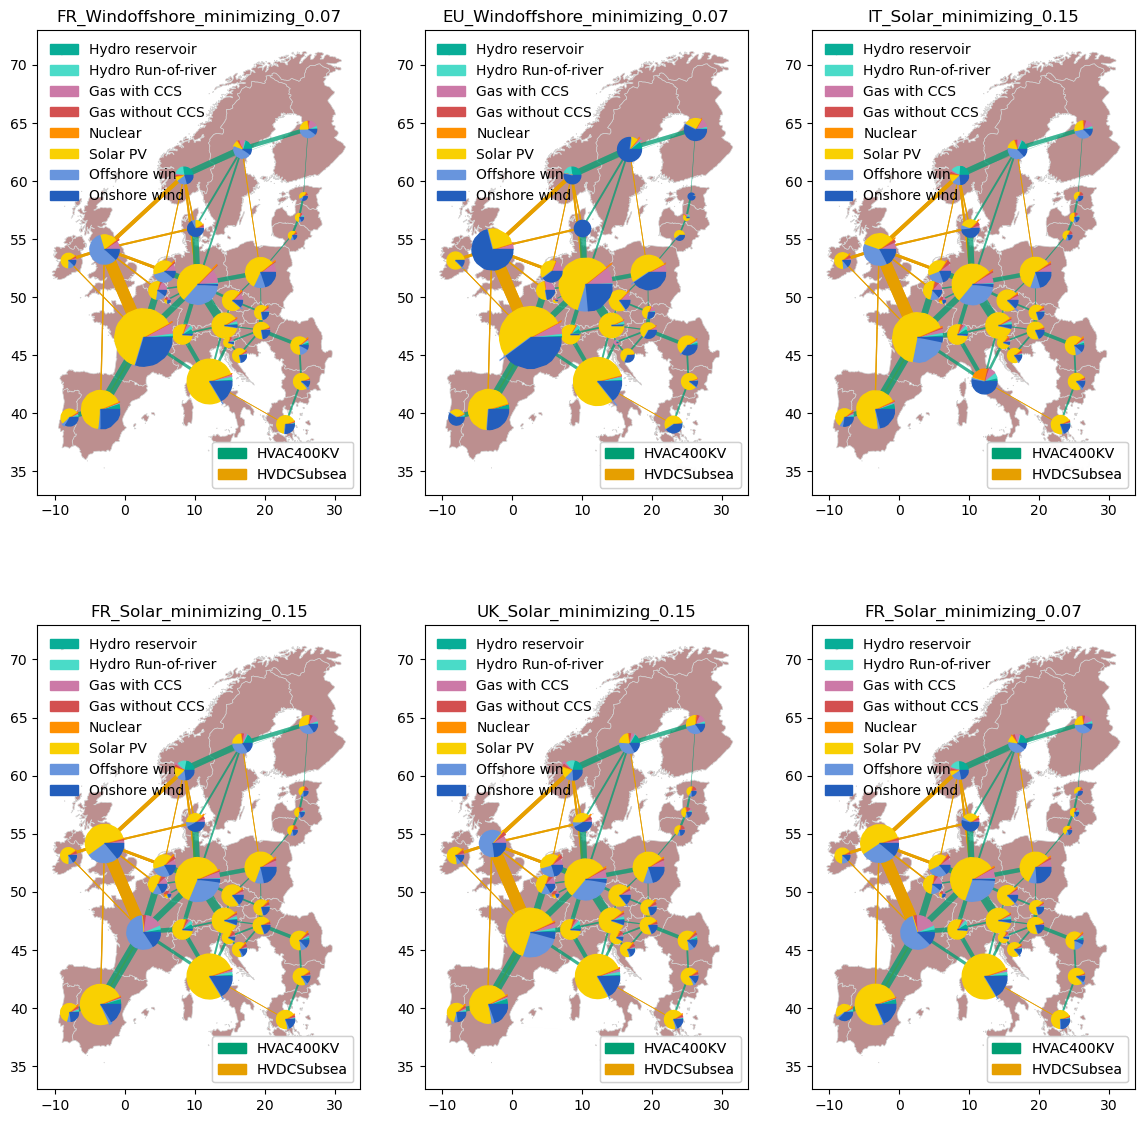

In [42]:
number_rows = 2
number_cols = 3

fig, axes = plt.subplots(number_rows, number_cols, figsize=(4*3.54,4*3.54))
#fig.subplots_adjust(left=0, right=1)

 # Generic
piecolors = [
    "#08ad97",
    "#4adbc8",
    "#CC79A7",
    "#d35050",
    "#ff9000",
    "#f9d002",
    "#6895dd",
    "#235ebc",
]

europe_shape = europe.copy().assign(
    center = lambda x : x.geometry.centroid,
    x_coord = lambda x : x.centroid.x,
    y_coord = lambda x : x.centroid.y,
)

europe_shape.at['NO', 'x_coord'] = 8.5
europe_shape.at['NO', 'y_coord'] = 60.5
row = 0
column = 0
count = 0

for scenario in top_performers:
    axes[row, column].set_title(scenario)
    df_trans = trans_cap2.loc[(scenario,slice(None),slice(None),slice(None),'level')].reset_index()
    
    df_trans_overhead = df_trans.loc[df_trans['trans'] == "HVAC400KV"].rename(columns={0 : 'level'})
    df_trans_subsea = df_trans.loc[df_trans['trans'] == "HVDCSubsea"].reset_index(drop=True).rename(columns={0 : 'level'})
    
    europe_trans = europe_shape.copy().sort_values("index").reset_index()

    # The transmission connections are simply plotted as a line between the zones. 
    df_trans_overhead['x1_coord'] = None
    df_trans_overhead['y1_coord'] = None
    df_trans_overhead['x2_coord'] = None
    df_trans_overhead['y2_coord'] = None
    
    for i in range(len(df_trans_overhead.index)):
        df_trans_overhead.x1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_1.iloc[i]].x_coord.to_numpy()[0]
        df_trans_overhead.y1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_1.iloc[i]].y_coord.to_numpy()[0]
        df_trans_overhead.x2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_2.iloc[i]].x_coord.to_numpy()[0]
        df_trans_overhead.y2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_2.iloc[i]].y_coord.to_numpy()[0]
    
    df_trans_subsea['x1_coord'] = None
    df_trans_subsea['y1_coord'] = None
    df_trans_subsea['x2_coord'] = None
    df_trans_subsea['y2_coord'] = None
    
    for i in range(len(df_trans_subsea.index)):
        df_trans_subsea.x1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_1.iloc[i]].x_coord.to_numpy()[0]
        df_trans_subsea.y1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_1.iloc[i]].y_coord.to_numpy()[0]
        df_trans_subsea.x2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_2.iloc[i]].x_coord.to_numpy()[0]
        df_trans_subsea.y2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_2.iloc[i]].y_coord.to_numpy()[0]
    
    df_cap = p_cap2.loc[
        (scenario,slice(None),slice(None),'level')
    ].sort_values(
        by='installed_capacity_GW',ascending=False
    ).reset_index(
    ).rename(
        columns={'zone' : 'index'}
    ).reset_index(
    ).merge(
        europe.reset_index()
    ).drop(
        columns={'level_0'}
    ).sort_values(
        by=['index','technology']
    )
    
    europe_shape = europe_shape.reindex(index=df_cap.set_index('index').index.unique())
    
    gdf_cap = gpd.GeoDataFrame(
        df_cap,
        crs = 'EPSG:4326',
        geometry = df_cap.geometry
    ).set_index('index')
    
    europe_shape.plot(
        ax=axes[row, column],
        color = 'rosybrown',
        edgecolor = 'lightgrey',
        linewidth = 0.5
    )
    
    hydro_res = mpatches.Patch(color='#08ad97', label='Hydro reservoir')
    hydro_ror = mpatches.Patch(color='#4adbc8', label='Hydro Run-of-river')
    gas_ccs_patch = mpatches.Patch(color='#CC79A7', label='Gas with CCS')
    gas_patch = mpatches.Patch(color='#d35050', label='Gas without CCS')
    nuclear = mpatches.Patch(color='#ff9000', label='Nuclear')
    solar = mpatches.Patch(color='#f9d002', label='Solar PV')
    offshore = mpatches.Patch(color='#6895dd', label='Offshore wind')
    onshore = mpatches.Patch(color='#235ebc', label='Onshore wind')
    
    first_legend = axes[row, column].legend(
        handles=[
            hydro_res,
            hydro_ror,
            gas_ccs_patch, 
            gas_patch, 
            nuclear,
            solar,
            offshore,
            onshore,
        ], 
        loc = 'upper left',
        frameon = False
    )

    second_legend = axes[row, column].legend(
        handles=[
            overhead_trans,
            subsea_trans
        ], 
        loc = 'lower right'
    )
    
    axes[row, column].add_artist(first_legend)
    axes[row, column].add_artist(second_legend)

    # plot pies
    for i in range(len(gdf_cap.index.unique())):
        name = europe_shape.iloc[i].name
        for j in range(8):
            axes[row, column].scatter(
                europe_shape.x_coord[i],
                europe_shape.y_coord[i],
                marker=(
                    pielist_list[count][i][0][j].get_path().vertices.tolist()
                ),
                facecolor=piecolors[j], 
                s=gdf_cap.loc[name].installed_capacity_GW.sum()*2,
                zorder=10
            )
            
    # plot subsea cables
    for i in range(len(df_trans_subsea.index)):
        axes[row, column].plot(
            [df_trans_subsea.x1_coord.iloc[i],df_trans_subsea.x2_coord.iloc[i]],
            [df_trans_subsea.y1_coord.iloc[i],df_trans_subsea.y2_coord.iloc[i]],
            '#E69F00',
            linewidth = df_trans_subsea.level.iloc[i]/3,
            alpha = 1,
            
        )    
    
    # plot overhead cables
    for i in range(len(df_trans_overhead.index)):
        axes[row, column].plot(
            [df_trans_overhead.x1_coord.iloc[i],df_trans_overhead.x2_coord.iloc[i]],
            [df_trans_overhead.y1_coord.iloc[i],df_trans_overhead.y2_coord.iloc[i]],
            '#009E73',
            linewidth = df_trans_overhead.level.iloc[i]/3,
            alpha = 0.5
        ) 
        
    count = count + 1
    if column < number_cols-1:
        column = column + 1
    else:
        column = 0
        row = row + 1
        

#plt.show()
plt.savefig('figures/top_performers_map.pdf',bbox_inches='tight')
plt.savefig('figures/top_performers_map.png',bbox_inches='tight')

## Difference

In [43]:
row_nr = 0
column_nr = 0
fig = plt.figure(figsize=(24,24), dpi=300,layout="constrained")

gs = fig.add_gridspec(6,1, wspace = 0.1, hspace = 0.1)
#ax = plt.subplots(1,1,figsize=(10,6))

for scenario in top_performers:
    ax1 = fig.add_subplot(gs[row_nr,column_nr])
    print(scenario)
    temp_diff = p_cap2.loc[
        (slice(None),slice(None),slice(None),'level')
    ].loc[
        (scenario,slice(None),slice(None))
    ].unstack(
    ).droplevel(
        level=0,
        axis=1
    )-p_cap2_base.loc[
        (' baseline',slice(None),slice(None),'level')
    ].unstack(
    ).droplevel(
        level=0,
        axis=1
    )
    
    plt.axhline(y=0, color = 'black',linestyle = '-',alpha = 0.5)
    
    temp_diff.plot.bar(
        ax=ax1,
        stacked=True,
        #legend=False,
        title=scenario,
        color = [
                "#08ad97",
                "#4adbc8",
                "#CC79A7",
                "#d35050",
                "#ff9000",
                "#f9d002",
                "#6895dd",
                "#235ebc",
            ]
    )
    
    ax1.legend(ncol=4,loc='upper right')
    #ax1.set_ylim(0,1000)
    
    column_nr += 1
    if column_nr == 1:
        column_nr = 0
        row_nr += 1

        

FR_Windoffshore_minimizing_0.07
EU_Windoffshore_minimizing_0.07
IT_Solar_minimizing_0.15
FR_Solar_minimizing_0.15
UK_Solar_minimizing_0.15
FR_Solar_minimizing_0.07


### Maps

In [44]:
trans_cap2.loc[
        (scenario,slice(None),slice(None),slice(None),'level')
    ].reset_index(
    )

country_1 country_2       trans          0
0          AT        CH   HVAC400KV   3.599926
1          AT        CZ   HVAC400KV   2.999954
2          AT        DE   HVAC400KV  18.899926
3          AT        HU   HVAC400KV   2.399975
4          AT        IT   HVAC400KV   3.974972
..        ...       ...         ...        ...
111        UK        ES  HVDCSubsea   2.699968
112        UK        FR  HVDCSubsea  25.424918
113        UK        IE  HVDCSubsea   6.089911
114        UK        NL  HVDCSubsea   5.999902
115        UK        NO  HVDCSubsea   8.399949

[116 rows x 4 columns]

In [45]:
trans_base.loc[
    (' baseline',slice(None),slice(None),slice(None),'level')
].reset_index(
)

country_1 country_2       trans       0
0          AT        CH   HVAC400KV   3.600
1          AT        CZ   HVAC400KV   3.000
2          AT        DE   HVAC400KV  18.900
3          AT        HU   HVAC400KV   2.400
4          AT        IT   HVAC400KV   3.975
..        ...       ...         ...     ...
111        UK        ES  HVDCSubsea   2.700
112        UK        FR  HVDCSubsea  25.425
113        UK        IE  HVDCSubsea   6.090
114        UK        NL  HVDCSubsea   6.000
115        UK        NO  HVDCSubsea   8.400

[116 rows x 4 columns]

In [46]:
diff_trans = trans_cap2.loc[
    (scenario,slice(None),slice(None),slice(None),'level')
]-trans_base.loc[
    (' baseline',slice(None),slice(None),slice(None),'level')
]

diff_trans = diff_trans.reset_index()

FR_Windoffshore_minimizing_0.07


/fp/homes01/u01/ec-oskarvaa/miniconda3/envs/analysis/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


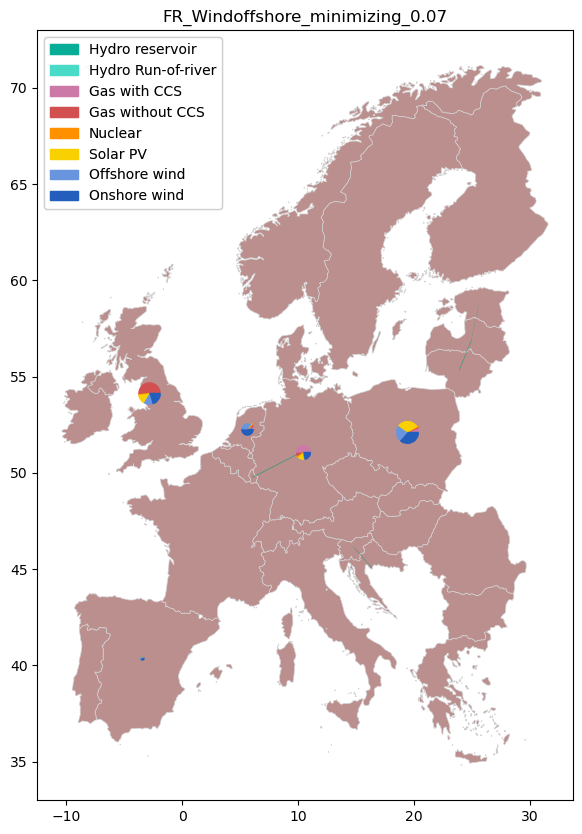

EU_Windoffshore_minimizing_0.07


/fp/homes01/u01/ec-oskarvaa/miniconda3/envs/analysis/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


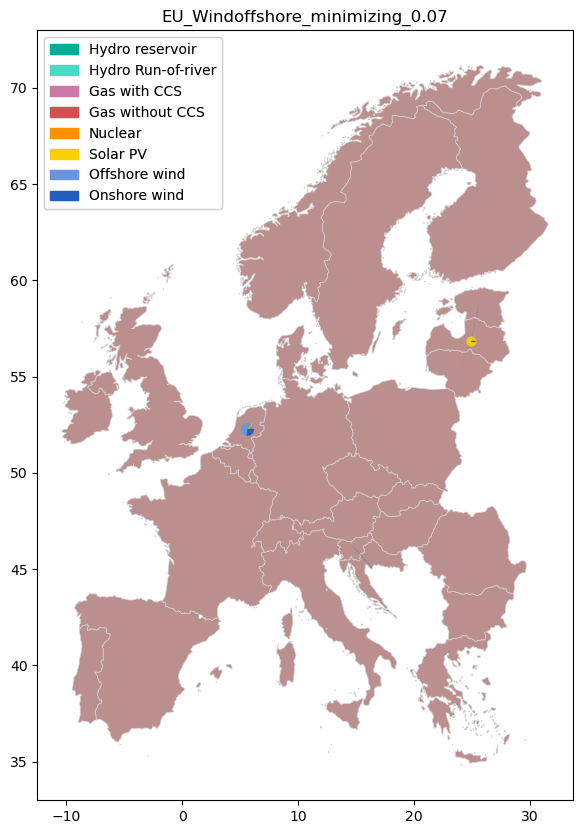

IT_Solar_minimizing_0.15


/fp/homes01/u01/ec-oskarvaa/miniconda3/envs/analysis/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


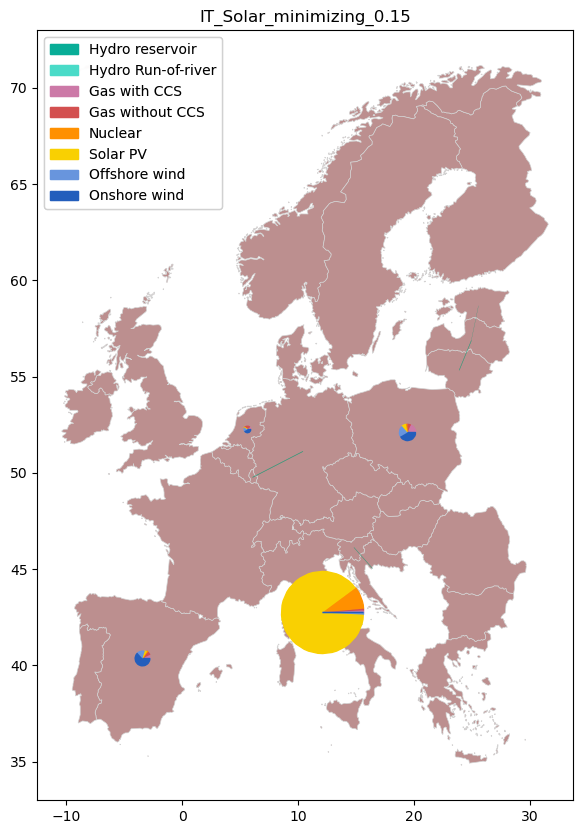

FR_Solar_minimizing_0.15


/fp/homes01/u01/ec-oskarvaa/miniconda3/envs/analysis/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


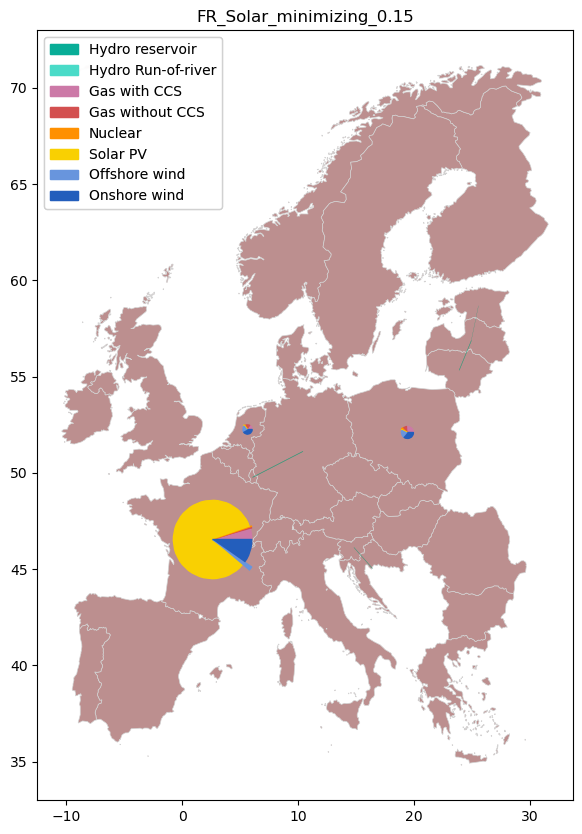

UK_Solar_minimizing_0.15


/fp/homes01/u01/ec-oskarvaa/miniconda3/envs/analysis/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


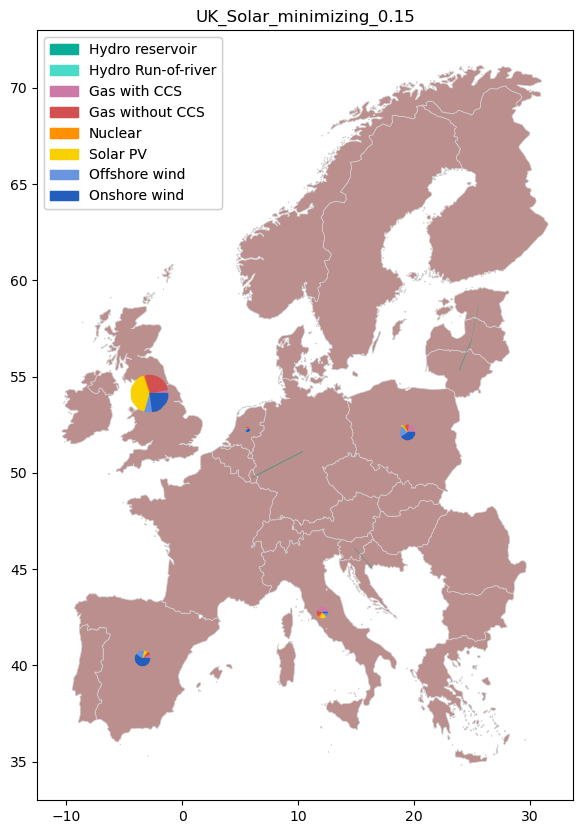

FR_Solar_minimizing_0.07


/fp/homes01/u01/ec-oskarvaa/miniconda3/envs/analysis/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


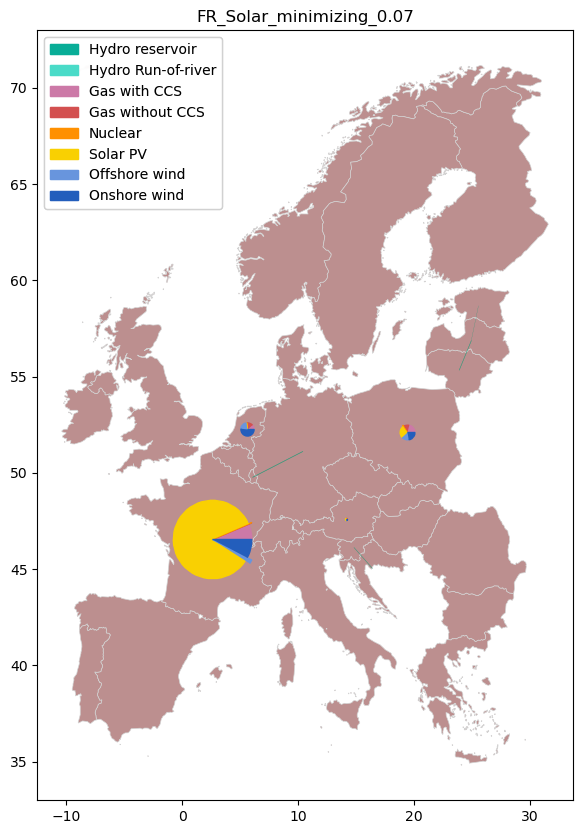

In [47]:
for scenario in top_performers:
    print(scenario)
    europe_shape = europe.copy().assign(
        center = lambda x : x.geometry.centroid,
        x_coord = lambda x : x.centroid.x,
        y_coord = lambda x : x.centroid.y,
    )
    
    europe_shape.at['NO', 'x_coord'] = 8.5
    europe_shape.at['NO', 'y_coord'] = 60.5
    
    
    diff_trans = trans_cap2.loc[
        (scenario,slice(None),slice(None),slice(None),'level')
    ]-trans_base.loc[
        (' baseline',slice(None),slice(None),slice(None),'level')
    ]

    diff_trans = diff_trans.reset_index()

    df_trans_overhead = diff_trans.loc[diff_trans['trans'] == "HVAC400KV"].rename(columns={0 : 'level'})
    df_trans_subsea = diff_trans.loc[diff_trans['trans'] == "HVDCSubsea"].reset_index(drop=True).rename(columns={0 : 'level'})
    
    europe_trans = europe_shape.copy().sort_values("index").reset_index()

    # The transmission connections are simply plotted as a line between the zones. 
    df_trans_overhead['x1_coord'] = None
    df_trans_overhead['y1_coord'] = None
    df_trans_overhead['x2_coord'] = None
    df_trans_overhead['y2_coord'] = None
    
    for i in range(len(df_trans_overhead.index)):
        df_trans_overhead.x1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_1.iloc[i]].x_coord.to_numpy()[0]
        df_trans_overhead.y1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_1.iloc[i]].y_coord.to_numpy()[0]
        df_trans_overhead.x2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_2.iloc[i]].x_coord.to_numpy()[0]
        df_trans_overhead.y2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_overhead.country_2.iloc[i]].y_coord.to_numpy()[0]
    
    df_trans_subsea['x1_coord'] = None
    df_trans_subsea['y1_coord'] = None
    df_trans_subsea['x2_coord'] = None
    df_trans_subsea['y2_coord'] = None
    
    for i in range(len(df_trans_subsea.index)):
        df_trans_subsea.x1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_1.iloc[i]].x_coord.to_numpy()[0]
        df_trans_subsea.y1_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_1.iloc[i]].y_coord.to_numpy()[0]
        df_trans_subsea.x2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_2.iloc[i]].x_coord.to_numpy()[0]
        df_trans_subsea.y2_coord.iloc[i] = europe_trans.loc[europe_trans['index'] == df_trans_subsea.country_2.iloc[i]].y_coord.to_numpy()[0]
    
    diff = p_cap2_base.loc[
        (' baseline',slice(None),slice(None),'level')
    ]-p_cap2.loc[
        (scenario,slice(None),slice(None),'level')
    ].fillna(0)
    
    diff = diff.reset_index(
    ).rename(
        columns={'zone' : 'index'}
    ).merge(
        europe.reset_index()
    ).sort_values(
        by=['index','technology']
    )
    
    europe_shape = europe_shape.reindex(index=diff.set_index('index').index.unique())
    
    gdf_cap = gpd.GeoDataFrame(
        diff,
        crs = 'EPSG:4326',
        geometry = diff.geometry
    ).set_index('index')
    
    pieList = []
    
    for country in gdf_cap.index.unique():
        wedges = []
        for i in range(8):
            temp = abs(diff.loc[
                (
                    diff["index"] == str(country)
                )
            ].set_index(
                'technology'
            ).installed_capacity_GW.iloc[i])
            wedges.append(temp)
              
        pie = plt.pie(wedges,
                     colors = [
                "#08ad97",
                "#4adbc8",
                "#CC79A7",
                "#d35050",
                "#ff9000",
                "#f9d002",
                "#6895dd",     
                "#235ebc",
            ])
        plt.close()
        pieList.append(pie)
    
    piecolors = [
        "#08ad97",
        "#4adbc8",
        "#CC79A7",
        "#d35050",
        "#ff9000",
        "#f9d002",
        "#6895dd",
        "#235ebc",
    ]
    
    fig, ax = plt.subplots(
        figsize = (10,10)
    )
    
    ax.set_title(scenario)
    
    europe_shape.plot(
        ax=ax,
        color = 'rosybrown',
        edgecolor = 'lightgrey',
        linewidth = 0.5
    )
    
    hydro_res = mpatches.Patch(color='#08ad97', label='Hydro reservoir')
    hydro_ror = mpatches.Patch(color='#4adbc8', label='Hydro Run-of-river')
    gas_ccs_patch = mpatches.Patch(color='#CC79A7', label='Gas with CCS')
    gas_patch = mpatches.Patch(color='#d35050', label='Gas without CCS')
    nuclear = mpatches.Patch(color='#ff9000', label='Nuclear')
    solar = mpatches.Patch(color='#f9d002', label='Solar PV')
    offshore = mpatches.Patch(color='#6895dd', label='Offshore wind')
    onshore = mpatches.Patch(color='#235ebc', label='Onshore wind')
    #overhead_trans = mpatches.Patch(color='#009E73', label='Overhead transmission')
    #subsea_trans = mpatches.Patch(color='#E69F00', label='Subsea transmission')
    
    first_legend = plt.legend(
        handles=[
            hydro_res,
            hydro_ror,
            gas_ccs_patch, 
            gas_patch, 
            nuclear,
            solar,
            offshore,
            onshore,
        ], 
        loc = 'upper left'
    )
    
    plt.gca().add_artist(first_legend)
    
    for i in range(len(gdf_cap.index.unique())):
        name = europe_shape.iloc[i].name
        for j in range(8):
            ax.scatter(
                europe_shape.x_coord[i],
                europe_shape.y_coord[i],
                marker=(
                    pieList[i][0][j].get_path().vertices.tolist()
                ),
                facecolor=piecolors[j], 
                s=gdf_cap.loc[name].installed_capacity_GW.sum()*10,
                zorder=10
            )
            
    #plot subsea cables
    for i in range(len(df_trans_subsea.index)):
        plt.plot(
            [df_trans_subsea.x1_coord.iloc[i],df_trans_subsea.x2_coord.iloc[i]],
            [df_trans_subsea.y1_coord.iloc[i],df_trans_subsea.y2_coord.iloc[i]],
            '#E69F00',
            linewidth = df_trans_subsea.level.iloc[i]/3,
            alpha = 1,
            
        )    
    
    # plot overhead cables
    for i in range(len(df_trans_overhead.index)):
        plt.plot(
            [df_trans_overhead.x1_coord.iloc[i],df_trans_overhead.x2_coord.iloc[i]],
            [df_trans_overhead.y1_coord.iloc[i],df_trans_overhead.y2_coord.iloc[i]],
            '#009E73',
            linewidth = df_trans_overhead.level.iloc[i]/3,
            alpha = 0.5
        )  
        
    plt.show()
    #plt.savefig('temporary.pdf')

In [48]:
gdf_cap.loc['NO']

technology  installed_capacity_GW  \
index                                                      
NO                       HydroRes               0.000000   
NO                       HydroRoR               0.000064   
NO     NaturalgasCCGTwithCCSnewOT              -1.707180   
NO              NaturalgasOCGTnew              -3.398675   
NO                     NuclearEPR              -0.410844   
NO                          Solar              -6.263155   
NO                   Windoffshore              -9.490838   
NO                    Windonshore              14.751167   

                                                geometry  
index                                                     
NO     MULTIPOLYGON (((28.83032 69.12078, 28.85331 69...  
NO     MULTIPOLYGON (((28.83032 69.12078, 28.85331 69...  
NO     MULTIPOLYGON (((28.83032 69.12078, 28.85331 69...  
NO     MULTIPOLYGON (((28.83032 69.12078, 28.85331 69...  
NO     MULTIPOLYGON (((28.83032 69.12078, 28.85331 69...  
NO     MULTIPOLYGON (((28.83032 69.12078, 28.85331 69...  
NO     MULTIPOLYGON (((28.83032 69.12078, 28.85331 69...  
NO     MULTIPOLYGON (((28.83032 69.12078, 28.85331 69...

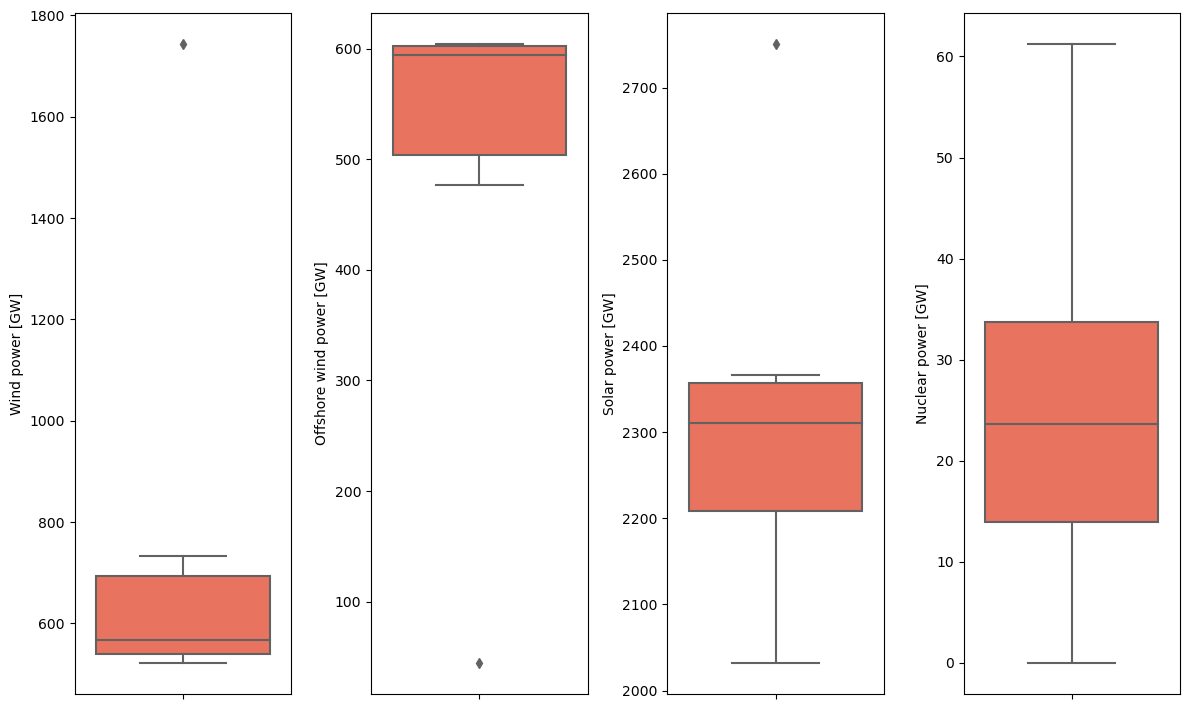

In [49]:
df_wide2 = p_cap2.loc[slice(None),slice(None),slice(None),'level'].reset_index().groupby(['scenario','technology']).sum().reset_index()
df_wide2

fig, axes = plt.subplots(1, 4, figsize=(12, 7.2))
fig.subplots_adjust(left=0, right=1)

sns.boxplot(
        ax=axes[0],
        x='technology', 
        y='installed_capacity_GW', 
        data=df_wide2[df_wide2['technology'] == 'Windonshore'], 
        showfliers=True, 
        color='tomato', 
        #hue='scenario',
        labels = None,
) 

sns.boxplot(
        ax=axes[1],
        x='technology', 
        y='installed_capacity_GW', 
        data=df_wide2[df_wide2['technology'] == 'Windoffshore'], 
        showfliers=True, 
        color='tomato', 
        #hue='scenario',
        labels = None,
) 

sns.boxplot(
        ax=axes[2],
        x='technology', 
        y='installed_capacity_GW', 
        data=df_wide2[df_wide2['technology'] == 'Solar'], 
        showfliers=True, 
        color='tomato', 
        #hue='scenario',
        labels = None,
)

sns.boxplot(
        ax=axes[3],
        x='technology', 
        y='installed_capacity_GW', 
        data=df_wide2[df_wide2['technology'] == 'NuclearEPR'], 
        showfliers=True, 
        color='tomato', 
        #hue='scenario',
        labels = None,
)

axes[0].set_ylabel('Wind power [GW]')
axes[0].set_xlabel(None)
axes[0].set(xticklabels=[])

axes[1].set_ylabel('Offshore wind power [GW]')
axes[1].set_xlabel(None)
axes[1].set(xticklabels=[])

axes[2].set_ylabel('Solar power [GW]')
axes[2].set_xlabel(None)
axes[2].set(xticklabels=[])

axes[3].set_ylabel('Nuclear power [GW]')
axes[3].set_xlabel(None)
axes[3].set(xticklabels=[])

fig.tight_layout()

#plt.savefig('boxplots_MENOFS_technologies.png',bbox_inches='tight')
#plt.savefig('boxplots_MENOFS_technologies.pdf',bbox_inches='tight')

In [50]:
df_wide2

scenario                  technology  \
0   EU_Windoffshore_minimizing_0.07                    HydroRes   
1   EU_Windoffshore_minimizing_0.07                    HydroRoR   
2   EU_Windoffshore_minimizing_0.07  NaturalgasCCGTwithCCSnewOT   
3   EU_Windoffshore_minimizing_0.07           NaturalgasOCGTnew   
4   EU_Windoffshore_minimizing_0.07                  NuclearEPR   
5   EU_Windoffshore_minimizing_0.07                       Solar   
6   EU_Windoffshore_minimizing_0.07                Windoffshore   
7   EU_Windoffshore_minimizing_0.07                 Windonshore   
8          FR_Solar_minimizing_0.07                    HydroRes   
9          FR_Solar_minimizing_0.07                    HydroRoR   
10         FR_Solar_minimizing_0.07  NaturalgasCCGTwithCCSnewOT   
11         FR_Solar_minimizing_0.07           NaturalgasOCGTnew   
12         FR_Solar_minimizing_0.07                  NuclearEPR   
13         FR_Solar_minimizing_0.07                       Solar   
14         FR_Solar_minimizing_0.07                Windoffshore   
15         FR_Solar_minimizing_0.07                 Windonshore   
16         FR_Solar_minimizing_0.15                    HydroRes   
17         FR_Solar_minimizing_0.15                    HydroRoR   
18         FR_Solar_minimizing_0.15  NaturalgasCCGTwithCCSnewOT   
19         FR_Solar_minimizing_0.15           NaturalgasOCGTnew   
20         FR_Solar_minimizing_0.15                  NuclearEPR   
21         FR_Solar_minimizing_0.15                       Solar   
22         FR_Solar_minimizing_0.15                Windoffshore   
23         FR_Solar_minimizing_0.15                 Windonshore   
24  FR_Windoffshore_minimizing_0.07                    HydroRes   
25  FR_Windoffshore_minimizing_0.07                    HydroRoR   
26  FR_Windoffshore_minimizing_0.07  NaturalgasCCGTwithCCSnewOT   
27  FR_Windoffshore_minimizing_0.07           NaturalgasOCGTnew   
28  FR_Windoffshore_minimizing_0.07                  NuclearEPR   
29  FR_Windoffshore_minimizing_0.07                       Solar   
30  FR_Windoffshore_minimizing_0.07                Windoffshore   
31  FR_Windoffshore_minimizing_0.07                 Windonshore   
32         IT_Solar_minimizing_0.15                    HydroRes   
33         IT_Solar_minimizing_0.15                    HydroRoR   
34         IT_Solar_minimizing_0.15  NaturalgasCCGTwithCCSnewOT   
35         IT_Solar_minimizing_0.15           NaturalgasOCGTnew   
36         IT_Solar_minimizing_0.15                  NuclearEPR   
37         IT_Solar_minimizing_0.15                       Solar   
38         IT_Solar_minimizing_0.15                Windoffshore   
39         IT_Solar_minimizing_0.15                 Windonshore   
40         UK_Solar_minimizing_0.15                    HydroRes   
41         UK_Solar_minimizing_0.15                    HydroRoR   
42         UK_Solar_minimizing_0.15  NaturalgasCCGTwithCCSnewOT   
43         UK_Solar_minimizing_0.15           NaturalgasOCGTnew   
44         UK_Solar_minimizing_0.15                  NuclearEPR   
45         UK_Solar_minimizing_0.15                       Solar   
46         UK_Solar_minimizing_0.15                Windoffshore   
47         UK_Solar_minimizing_0.15                 Windonshore   

    installed_capacity_GW  
0            9.400671e+01  
1            6.536253e+01  
2            2.858413e+02  
3            1.003935e-07  
4            4.820705e-08  
5            2.750279e+03  
6            4.466423e+01  
7            1.743135e+03  
8            9.400671e+01  
9            6.535550e+01  
10           2.002344e+02  
11           7.844474e+01  
12           1.425473e+01  
13           2.179506e+03  
14           6.027478e+02  
15           5.222042e+02  
16           9.400671e+01  
17           6.535058e+01  
18           1.785394e+02  
19           1.016179e+02  
20           3.292070e+01  
21           2.294046e+03  
22           6.005900e+02  
23           5.788948e+02  
24           9.400671e+01  
25           6.

In [51]:
gen = []
# Options are 'quick', 'full' or 'super-quick'
how = 'quick'

if how == 'quick':
    for scenario in top_performers:
        print(scenario + ".db")
        con = sqlite3.connect(clusterpath + "data/" + str(scenario) + ".db")
        gen.append(
            pd
            .read_sql_query("SELECT * from var_gen", con)
            .drop(columns={'lo','up','marginal'})
            .set_index(['z','h','g'])
            .stack()
            .reset_index()
            .rename(columns={
                        "z": "zone",
                        "g": "technology",
                        "h": "hour",
                        "level_3" : "type",
                        0: 'electricity_generatioN_GWh'
                    })
            .assign(scenario=scenario)
            .astype({'hour' : int})
            .set_index(['scenario','zone','technology','hour','type'])
            .sort_index())
        con.close()
    df_gen = pd.concat(gen)
    del(gen)    

FR_Windoffshore_minimizing_0.07.db
EU_Windoffshore_minimizing_0.07.db
IT_Solar_minimizing_0.15.db
FR_Solar_minimizing_0.15.db
UK_Solar_minimizing_0.15.db
FR_Solar_minimizing_0.07.db


In [53]:
gen = []

for extra_scenario in extras:
    print(extra_scenario + ".db")
    con = sqlite3.connect(clusterpath + "data/" + str(extra_scenario) + ".db")
    gen.append(
        pd
        .read_sql_query("SELECT * from var_gen", con)
        .drop(columns={'lo','up','marginal'})
        .set_index(['z','h','g'])
        .stack()
        .reset_index()
        .rename(columns={
                    "z": "zone",
                    "g": "technology",
                    "h": "hour",
                    "level_3" : "type",
                    0: 'electricity_generatioN_GWh'
                })
        .assign(scenario=extra_scenario)
        .astype({'hour' : int})
        .set_index(['scenario','zone','technology','hour','type'])
        .sort_index())
    con.close()
df_gen_base = pd.concat(gen)
del(gen)    

 baseline.db


In [54]:
df_gen_base

electricity_generatioN_GWh
scenario  zone technology  hour type                             
 baseline AT   HydroRes    0    level                1.369509e-07
                           1    level                1.312611e-07
                           2    level                1.369745e-07
                           3    level                1.369975e-07
                           4    level                1.369999e-07
...                                                           ...
          UK   Windonshore 8755 level                2.349353e+00
                           8756 level                2.461227e+00
                           8757 level                2.461227e+00
                           8758 level                2.573101e+00
                           8759 level                2.573101e+00

[1646880 rows x 1 columns]

In [55]:
df_wide3 = df_gen.groupby(['scenario','technology']).sum().reset_index()

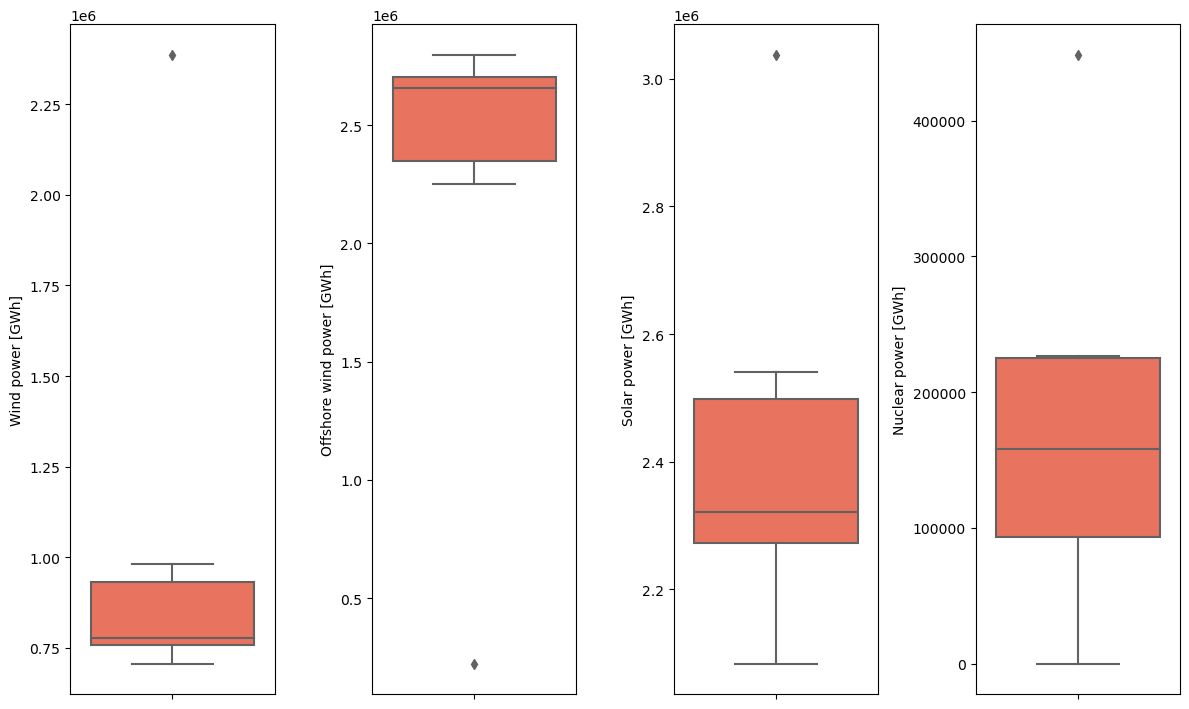

In [56]:
df_wide3 = df_gen.groupby(['scenario','technology']).sum().reset_index()


fig, axes = plt.subplots(1, 4, figsize=(12, 7.2))
fig.subplots_adjust(left=0, right=1)

sns.boxplot(
        ax=axes[0],
        x='technology', 
        y='electricity_generatioN_GWh', 
        data=df_wide3[df_wide3['technology'] == 'Windonshore'], 
        showfliers=True, 
        color='tomato', 
        #hue='scenario',
        labels = None,
) 

sns.boxplot(
        ax=axes[1],
        x='technology', 
        y='electricity_generatioN_GWh', 
        data=df_wide3[df_wide3['technology'] == 'Windoffshore'], 
        showfliers=True, 
        color='tomato', 
        #hue='scenario',
        labels = None,
) 

sns.boxplot(
        ax=axes[2],
        x='technology', 
        y='electricity_generatioN_GWh', 
        data=df_wide3[df_wide3['technology'] == 'Solar'], 
        showfliers=True, 
        color='tomato', 
        #hue='scenario',
        labels = None,
)

sns.boxplot(
        ax=axes[3],
        x='technology', 
        y='electricity_generatioN_GWh', 
        data=df_wide3[df_wide3['technology'] == 'NuclearEPR'], 
        showfliers=True, 
        color='tomato', 
        #hue='scenario',
        labels = None,
)

axes[0].set_ylabel('Wind power [GWh]')
axes[0].set_xlabel(None)
axes[0].set(xticklabels=[])

axes[1].set_ylabel('Offshore wind power [GWh]')
axes[1].set_xlabel(None)
axes[1].set(xticklabels=[])

axes[2].set_ylabel('Solar power [GWh]')
axes[2].set_xlabel(None)
axes[2].set(xticklabels=[])

axes[3].set_ylabel('Nuclear power [GWh]')
axes[3].set_xlabel(None)
axes[3].set(xticklabels=[])

fig.tight_layout()

#plt.savefig('boxplots_MENOFS_technologies.png',bbox_inches='tight')
#plt.savefig('boxplots_MENOFS_technologies.pdf',bbox_inches='tight')

In [57]:
top_performers

['FR_Windoffshore_minimizing_0.07',
 'EU_Windoffshore_minimizing_0.07',
 'IT_Solar_minimizing_0.15',
 'FR_Solar_minimizing_0.15',
 'UK_Solar_minimizing_0.15',
 'FR_Solar_minimizing_0.07']

In [58]:
df_gen.groupby(['scenario','technology']).sum().unstack().droplevel(level=0,axis=1)#.div(1000)

technology                            HydroRes       HydroRoR  \
scenario                                                        
EU_Windoffshore_minimizing_0.07  322526.851312  332688.495704   
FR_Solar_minimizing_0.07         293097.720144  311420.914711   
FR_Solar_minimizing_0.15         273281.717261  295642.957385   
FR_Windoffshore_minimizing_0.07  292095.981194  309164.725714   
IT_Solar_minimizing_0.15         282743.350985  306543.355082   
UK_Solar_minimizing_0.15         266189.543982  289125.475790   

technology                       NaturalgasCCGTwithCCSnewOT  \
scenario                                                      
EU_Windoffshore_minimizing_0.07               289339.355419   
FR_Solar_minimizing_0.07                      212944.812521   
FR_Solar_minimizing_0.15                      194474.028860   
FR_Windoffshore_minimizing_0.07               233299.920648   
IT_Solar_minimizing_0.15                      197960.390868   
UK_Solar_minimizing_0.15                      184971.315091   

technology                       NaturalgasOCGTnew     NuclearEPR  \
scenario                                                            
EU_Windoffshore_minimizing_0.07           0.000008       0.000323   
FR_Solar_minimizing_0.07               6392.321488   95778.762648   
FR_Solar_minimizing_0.15               7937.905978  220638.068970   
FR_Windoffshore_minimizing_0.07        4689.072814   92988.754468   
IT_Solar_minimizing_0.15               7646.220127  448693.755559   
UK_Solar_minimizing_0.15               8732.906667  226968.485938   

technology                              Solar  Windoffshore   Windonshore  
scenario                                                                   
EU_Windoffshore_minimizing_0.07  3.038109e+06  2.226610e+05  2.386947e+06  
FR_Solar_minimizing_0.07         2.272480e+06  2.798098e+06  7.061798e+05  
FR_Solar_minimizing_0.15         2.272873e+06  2.711436e+06  7.899434e+05  
FR_Windoffshore_minimizing_0.07  2.540697e+06  2.250461e+06  9.806305e+05  
IT_Solar_minimizing_0.15         2.083166e+06  2.634367e+06  7.626631e+05  
UK_Solar_minimizing_0.15         2.368671e+06  2.675912e+06  7.576440e+05

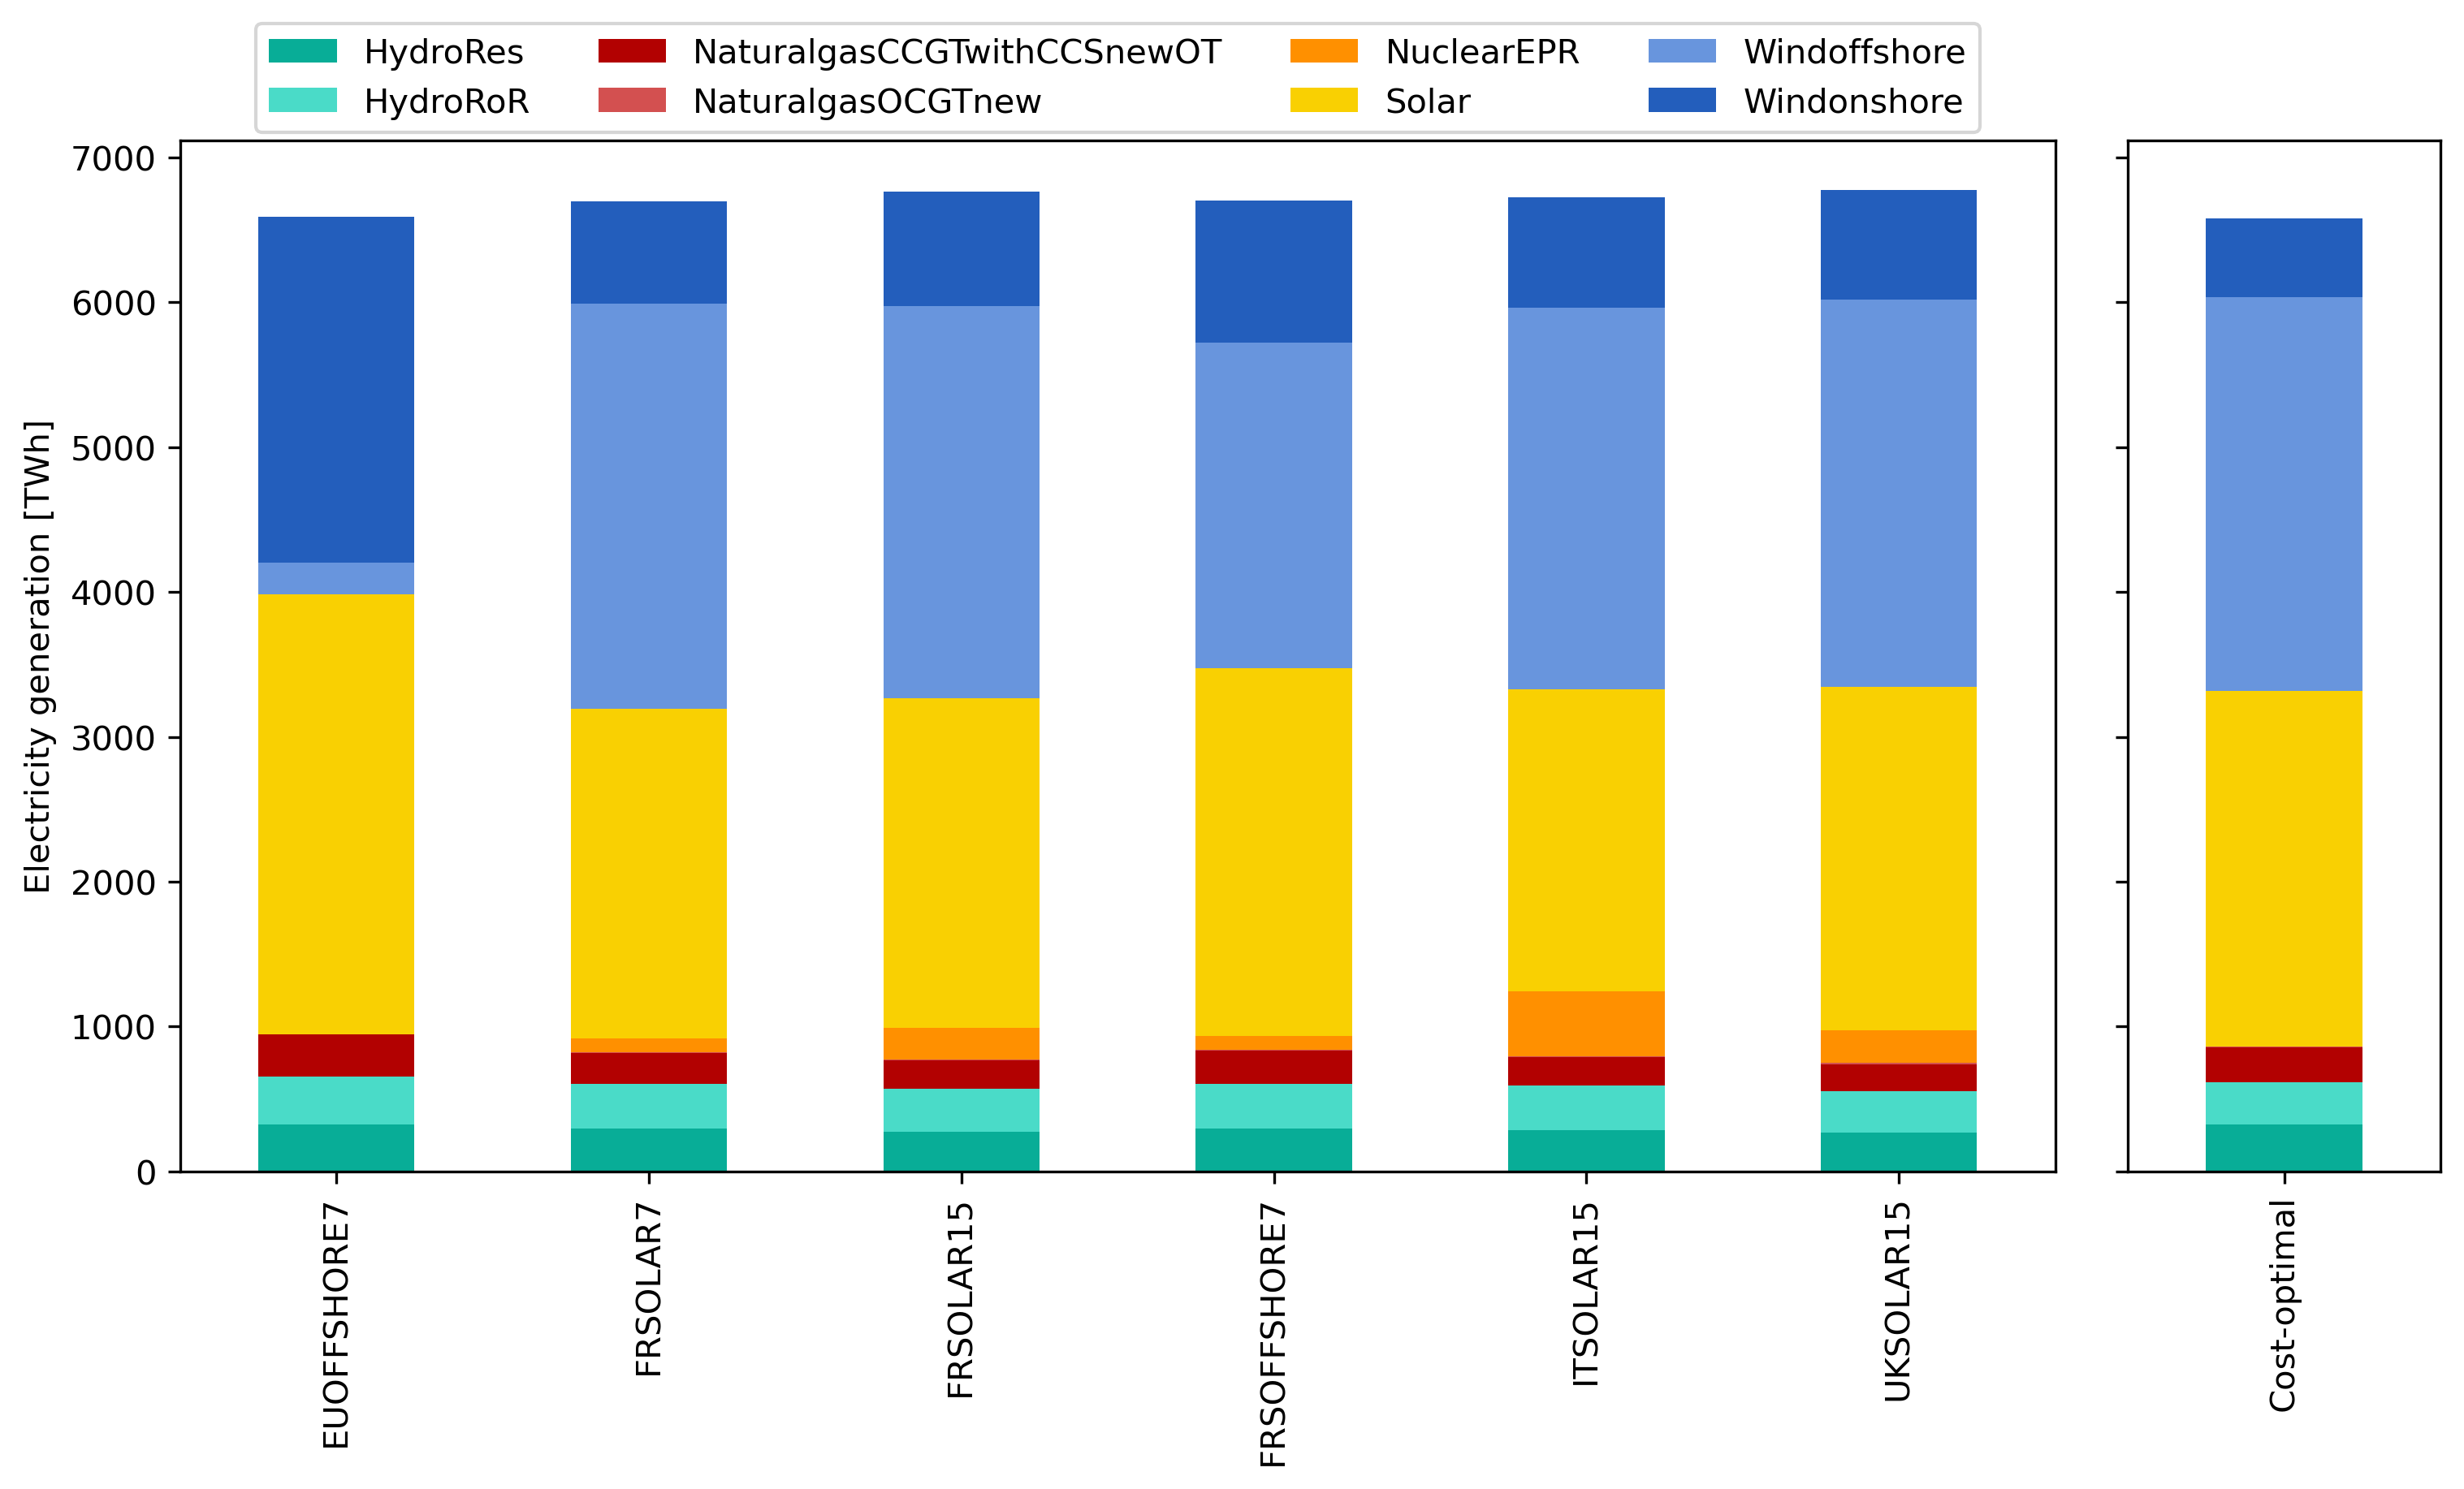

In [59]:
fig = plt.figure(figsize=(10,6), dpi=300,layout="constrained")

gs = fig.add_gridspec(1,2,width_ratios=(6, 1),wspace = 0.05, )
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1],sharey=ax1)

df_gen.groupby(['scenario','technology']).sum().unstack().droplevel(level=0,axis=1).div(1000).plot.bar(stacked=True,ax=ax1,color=colordict)
ax1.legend(loc='upper center',bbox_to_anchor=[0.5,1.13],ncol=4)
ax1.set_xlabel(None)
ax1.set(xticklabels=['EUOFFSHORE7','FRSOLAR7','FRSOLAR15','FRSOFFSHORE7','ITSOLAR15','UKSOLAR15'])
ax1.set_ylabel('Electricity generation [TWh]')

df_gen_base.groupby(['scenario','technology']).sum().unstack().droplevel(level=0,axis=1).div(1000).plot.bar(stacked=True, ax=ax2, color=colordict,legend=None)
ax2.set_xlabel(None)
ax2.set(xticklabels=['Cost-optimal'])

plt.savefig('figures/top_performers_generation.png',bbox_inches='tight')
plt.savefig('figures/top_performers_generation.pdf',bbox_inches='tight')